In [ ]:
# This Jupyter notebook is made by Dawoon Jung following "An Introduction to Statistical Learning"
# Python version 3.11
!python --version

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Linear Regression

*Linear regression* is a very straightforward approach for predicting a quantitative response *Y* on the basis of a single predictor variable *X*

<font size='5'><u>**It assumes that *Y* and *X* have a linear relationship**</u></font>


## Data: Boston housing data

In [63]:
data = pd.read_csv('Data/Boston.csv')
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

Boston housing data set, which is contained in the ISLP package. 

The **`Boston`** dataset records **`medv`** (Median value of owner-occupied homes in \$1000's) for 
 neighborhoods around Boston. We will build a regression model to predict **`medv`** using 
 predictors such as **`crim`** (per capita crime rate by town), **`zn`** (proportion of residential land zoned for lots over 25,000 sq.ft), **`indus`** (proportion of non-retail business acres per town), **`chas`** (Charles River dummy variable (1 if tract bounds river; 0 otherwise), **`nox`** (nitric oxides concentration (parts per 10 million)), **`rm`** (average number of rooms per dwelling), **`dis`** (weighted distances to five Boston employment centres), **`rad`** (index of accessibility to radial highways),
**`tax`** (full-value property-tax rate per \$10,000), **`ptratio`** (pupil-teacher ratio by town B - 1000$(Bk - 0.63)^2$ where Bk is the proportion of blacks by town), **`lstat`** (percent of households with low socioeconomic status)

We will use **`numpy`** for this task

In [64]:
np.shape(data)

(506, 13)

In [67]:
data.tail()

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

     lstat  medv  
501   9.67  22.4  
502   9.08  20.6  
503   5.64  23.9  
504   6.48  22.0  
505   7.88  11.9

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [70]:
data.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

In [72]:
def generate_color_list(n):
    # Generate a list of n colors from the tab20 colormap
    color_list = [plt.cm.tab20(i % 20) for i in range(n)]  # tab20 has 20 distinct colors
    return [mcolors.rgb2hex(color) for color in color_list]  # Convert to hex format

n = len(data.columns)  # Set the desired number of colors
color_list = generate_color_list(n)
color_dict = dict(zip(data.columns,color_list))

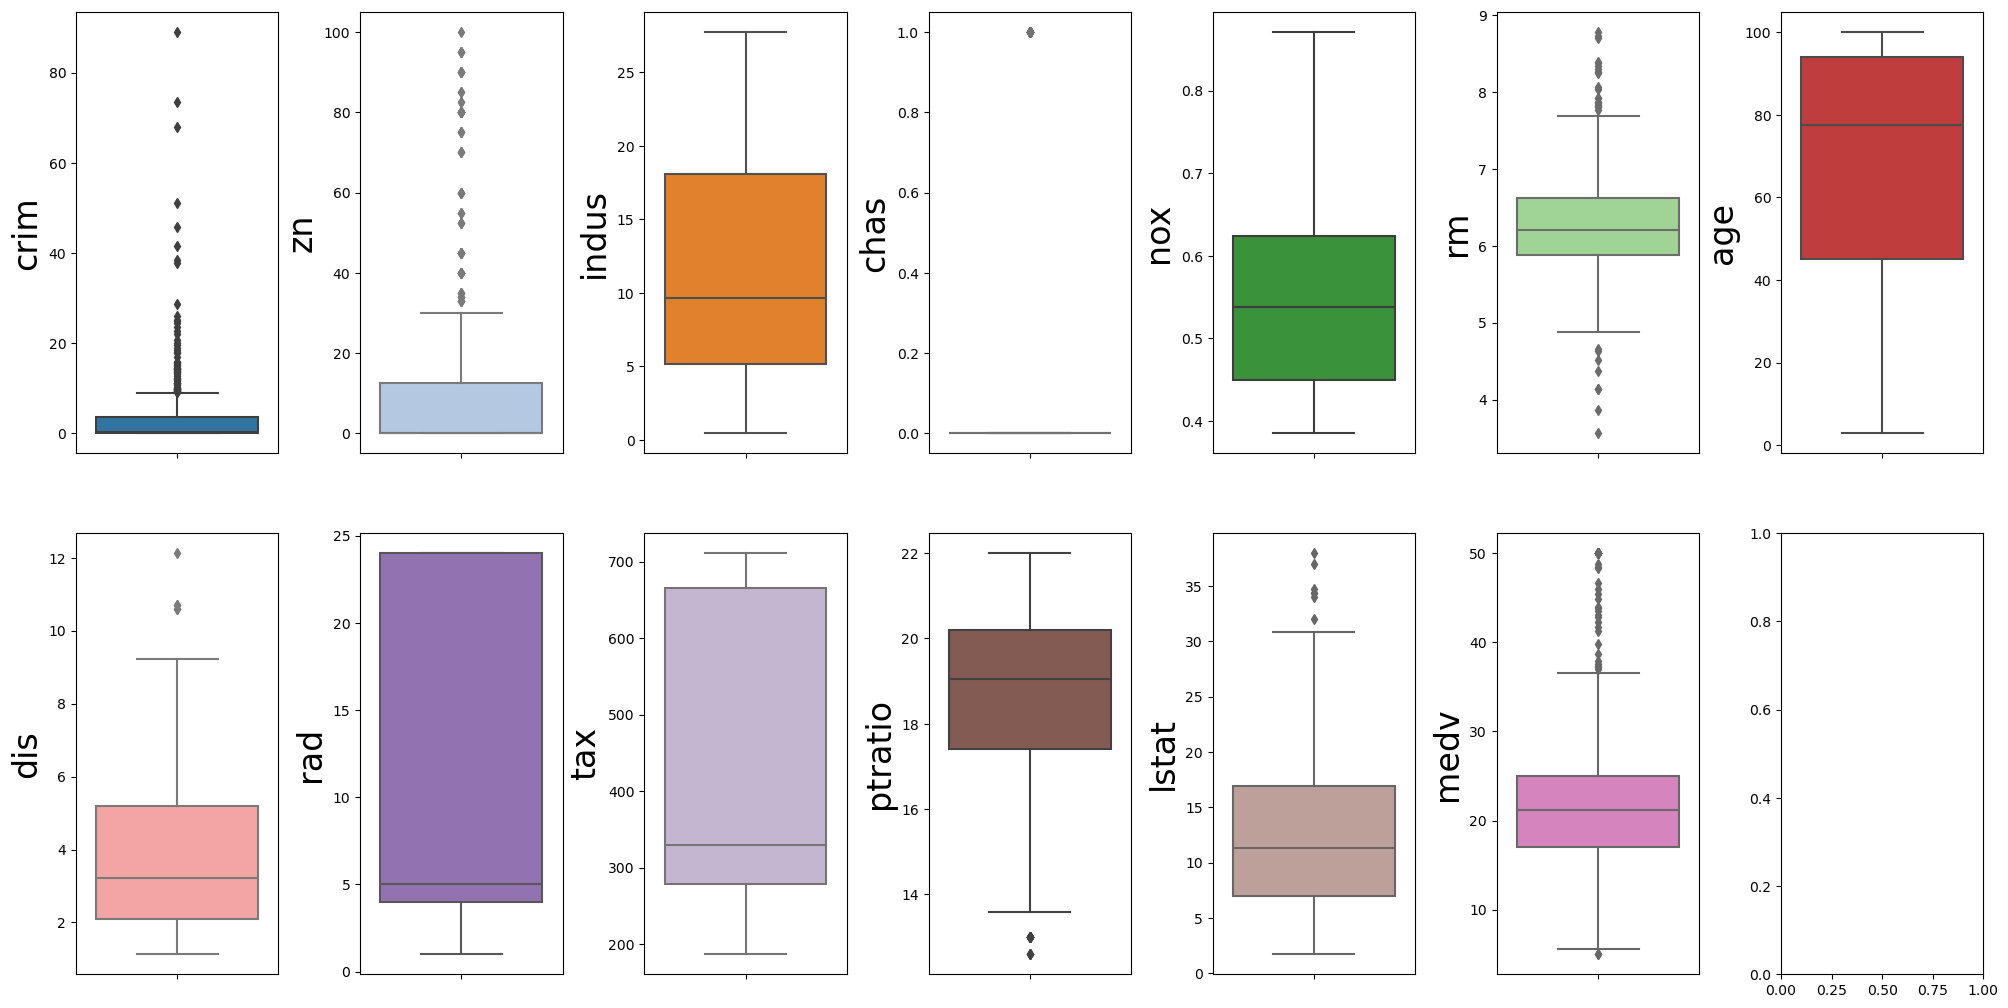

In [75]:
# Create a figure with 2 rows and 7 columns of subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Initialize the index for subplot positioning
index = 0

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each item in the data dictionary
for k, v in data.items():
    # Create a box plot for each variable (k) in the data
    sns.boxplot(y=k, data=data, ax=ax[index], color = color_dict[k])
    
    ax[index].set_ylabel(k,fontsize = 24) # Adjust the fontsize as needed
    
    # Increment the index to move to the next subplot
    index += 1

# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


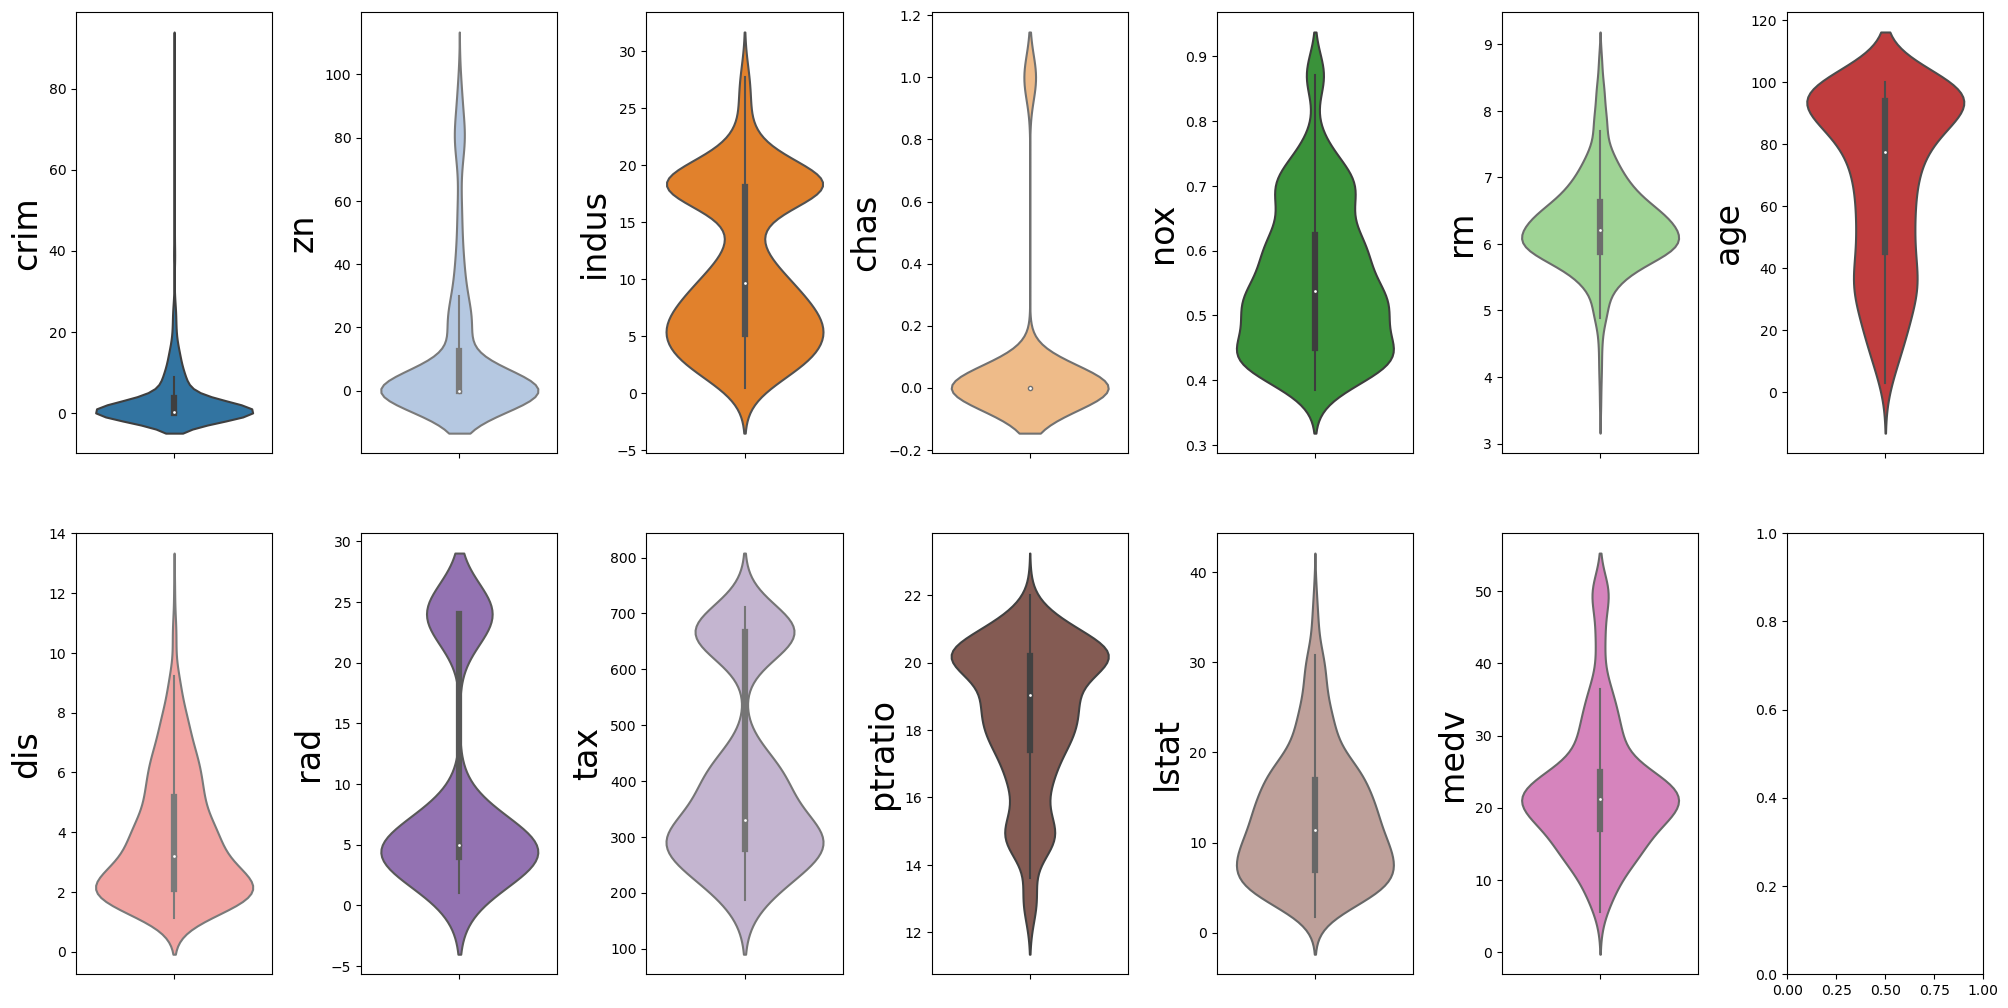

In [76]:
# Create a figure with 2 rows and 7 columns of subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Initialize the index for subplot positioning
index = 0

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each item in the data dictionary
for k, v in data.items():
    
    # Create a violin plot for each variable (k) in the data
    sns.violinplot(y=k, data=data, ax=ax[index], color = color_dict[k])
    
    ax[index].set_ylabel(k,fontsize = 24) # Adjust the fontsize as needed
    
    # Increment the index to move to the next subplot
    index += 1

# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


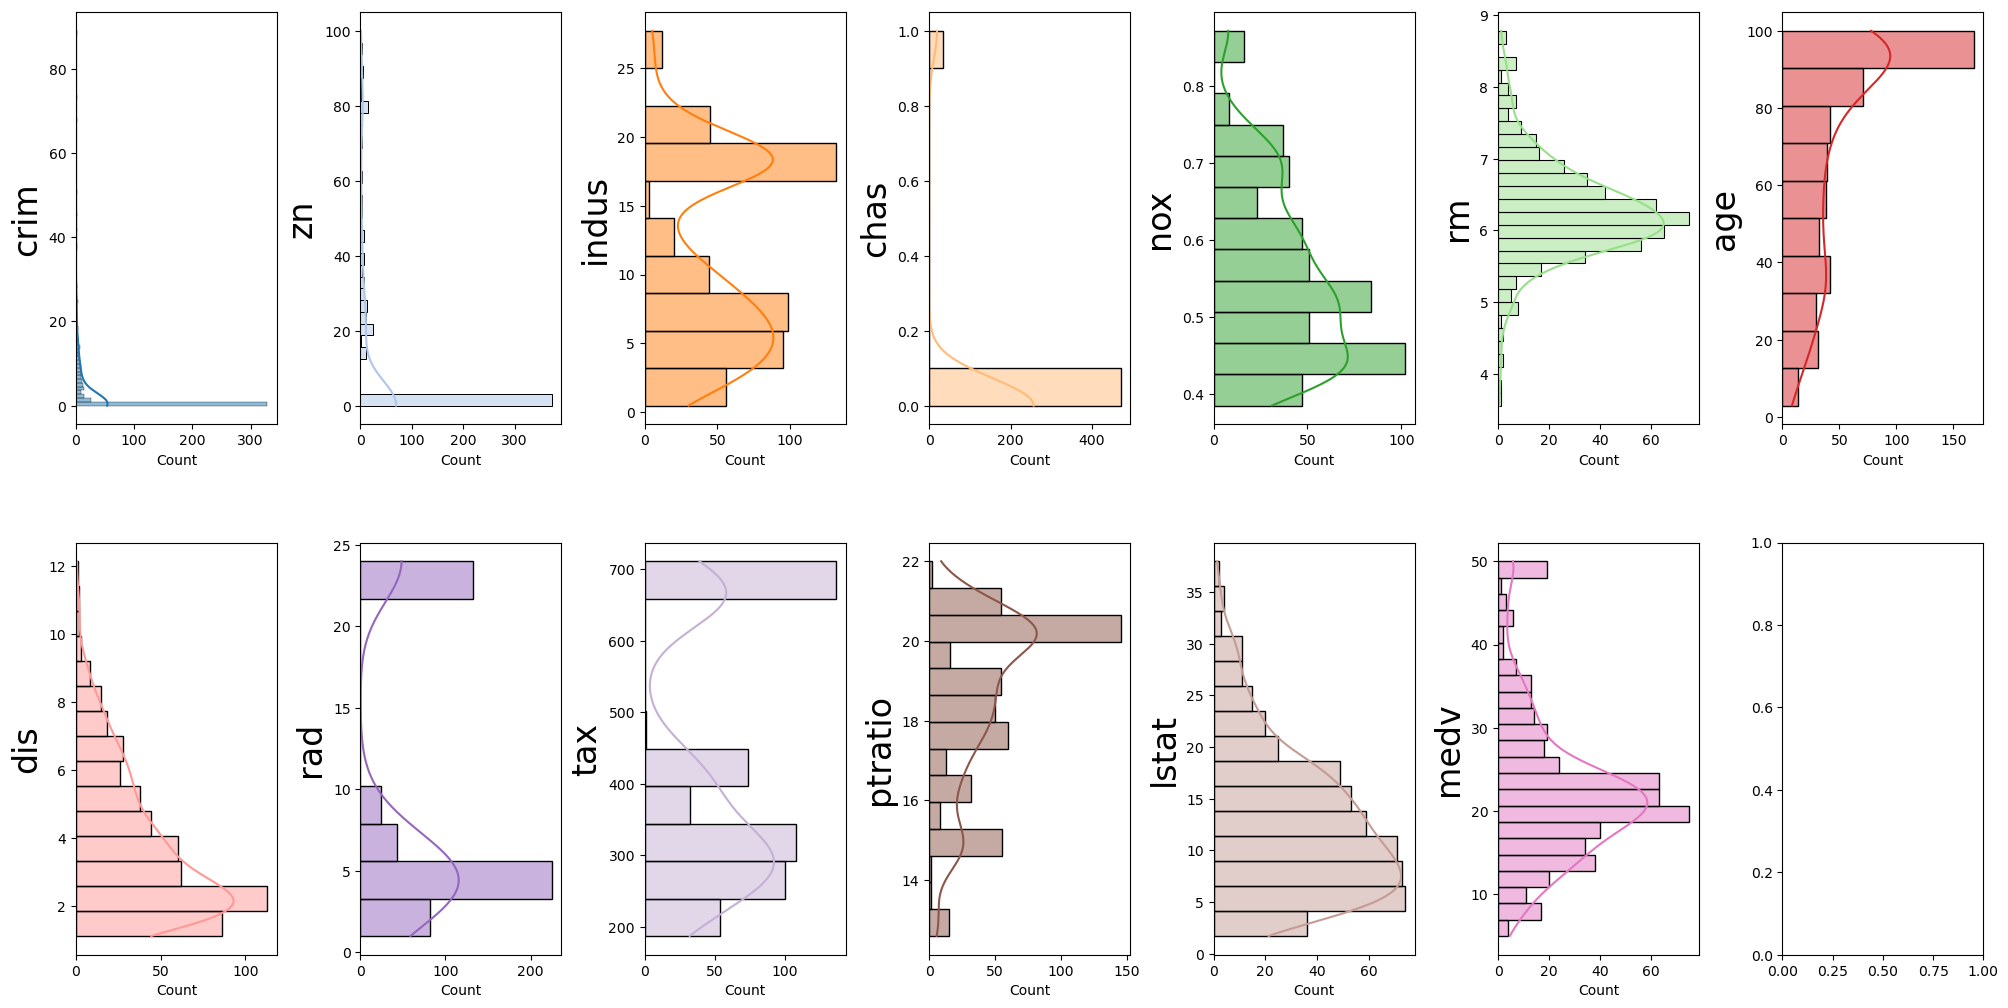

In [77]:
# Create a figure with 2 rows and 7 columns of subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Initialize the index for subplot positioning
index = 0

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each item in the data dictionary
for k, v in data.items():
    # Create a histogram plot with KDE for each variable (k) in the data
    sns.histplot(y=k, data=data, ax=ax[index], color=color_dict.get(k, 'gray'), kde=True)  # Use color_dict for color
    
    # Set the y-axis label size
    ax[index].set_ylabel(k, fontsize=24)  # Adjust the fontsize as needed
    
    # Increment the index to move to the next subplot
    index += 1

# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


From the start, two data columns stand out. First, ZN (proportion of land zoned for lots over 25,000 sq.ft.) has values of 0 at the 25th and 50th percentiles. Second, CHAS (Charles River dummy variable) is 0 at the 25th, 50th, and 75th percentiles. These are expected since both are categorical. They might not be useful in predicting MEDV (Median value of homes).
Another point is that MEDV is capped at 50.00, meaning values above that may not help in predicting it. Let’s plot the data to explore further.

## Outlier

**Outliers** are values in the distribution of data that is very large or small compared to other values, i.e., a value that is out of phase with the rest of the data. Outliers play an important role in data analysis, and if handled incorrectly, they can skew the results of your analysis.
Some of the common methods used to handle outliers are:

**Interquartile Range (IQR)**: 
Finding the difference between the first quartile **(Q1)** and the third quartile **(Q3)** **(IQR = Q3 - Q1)**, and using this to set upper and lower boundaries.
Outliers are typically defined as values less than **(Q1 - 1. 5*IQR)** or greater than **(Q3 + 1.5*IQR)**.

**Standard Deviation**:
If your data follows a normal distribution, values that are more than 2-3 standard deviations away from the mean are considered Outliers.

**Z-Score**:
The mean is subtracted from each data value, and then divided by the standard deviation is the Z-Score.
Values with a Z-Score above 3 or below -3 are generally judged to be outliers.

In [79]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = len(v_col) * 100.0 / len(v)
    print("Column %s outliers = %.2f%%" % (k, perc))
# chas is dummy variable (0 or 1)

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


Remove outliers of **`medv`** column:

In [80]:
# Create an empty dictionary to store the filtered data without outliers
filtered_data = {}

# Detect and remove outliers for all variables except 'chas'
for k, v in data.items():
    if k== "medv":  # Select the 'medv' variable
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        # Keep only the values within the IQR range
        filtered_data[k] = v[(v > q1 - 1.5 * iqr) & (v < q3 + 1.5 * iqr)]
    else:
        # Keep the 'chas' variable unchanged
        filtered_data[k] = v

# Convert the filtered data into a DataFrame (removing any NaN values)
filtered_df = pd.DataFrame(filtered_data).dropna()
filtered_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [81]:
filtered_df.describe()

crim          zn       indus        chas         nox          rm  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     3.590278   10.580472   11.382446    0.060086    0.556826    6.179633   
std      8.245015   22.177036    6.793901    0.237901    0.117400    0.576325   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.082757    0.000000    5.640000    0.000000    0.453000    5.876250   
50%      0.247510    0.000000    9.900000    0.000000    0.538000    6.163500   
75%      3.755472   12.500000   18.100000    0.000000    0.624000    6.506250   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean    68.666524    3.833586    9.669528  413.105150   18.617382   13.275687   
std     28.046527    2.124901    8.792361  168.544572    2.063273    6.934097   
min      2.900000    1.137000    1.000000  187.000000   12.600000    1.980000   
25%     45.175000    2.104425    4.000000  284.000000   17.400000    7.790000   
50%     77.500000    3.272100    5.000000  335.000000   19.100000   12.125000   
75%     94.100000    5.241300   24.000000  666.000000   20.200000   17.205000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  466.000000  
mean    20.719099  
std      6.451416  
min      5.600000  
25%     16.500000  
50%     20.600000  
75%     24.075000  
max     36.500000

## Correlation

**Correlation** is a statistical measure that expresses the strength and direction of a linear relationship between two variables. It is represented by the correlation coefficient, which can range from -1 to 1. The most commonly used correlation coefficient is the **Pearson correlation coefficient**. The formula is as follows:

$$r = \frac{\sum (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum (X_i - \overline{X})^2} \sqrt{\sum (Y_i - \overline{Y})^2}}$$
    
Where:
- $r$ is the Pearson correlation coefficient.
- $X_i$ and $Y_i$ are individual data points of variables $X$ and $Y$.
- $\overline{X}$ and $\overline{Y}$ are the means of $X$ and $Y$, respectively.
- $\sum$ denotes the sum over all data points.

In [82]:
filtered_df.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.203706  0.410679 -0.065371  0.422928 -0.199504  0.357666   
zn      -0.203706  1.000000 -0.536503 -0.055538 -0.513071  0.322274 -0.559513   
indus    0.410679 -0.536503  1.000000  0.037869  0.766019 -0.369447  0.646233   
chas    -0.065371 -0.055538  0.037869  1.000000  0.092005  0.060187  0.077140   
nox      0.422928 -0.513071  0.766019  0.092005  1.000000 -0.308291  0.727998   
rm      -0.199504  0.322274 -0.369447  0.060187 -0.308291  1.000000 -0.271742   
age      0.357666 -0.559513  0.646233  0.077140  0.727998 -0.271742  1.000000   
dis     -0.390521  0.685944 -0.729908 -0.086312 -0.771634  0.270629 -0.741121   
rad      0.637234 -0.306184  0.588879 -0.033668  0.607829 -0.161677  0.452635   
tax      0.592757 -0.302126  0.708080 -0.067897  0.665039 -0.230787  0.506743   
ptratio  0.285594 -0.376451  0.366943 -0.120863  0.181092 -0.223777  0.272825   
lstat    0.453313 -0.425632  0.620535 -0.006830  0.606631 -0.575358  0.650283   
medv    -0.482030  0.436177 -0.612220  0.097053 -0.569014  0.568940 -0.557098   

              dis       rad       tax   ptratio     lstat      medv  
crim    -0.390521  0.637234  0.592757  0.285594  0.453313 -0.482030  
zn       0.685944 -0.306184 -0.302126 -0.376451 -0.425632  0.436177  
indus   -0.729908  0.588879  0.708080  0.366943  0.620535 -0.612220  
chas    -0.086312 -0.033668 -0.067897 -0.120863 -0.006830  0.097053  
nox     -0.771634  0.607829  0.665039  0.181092  0.606631 -0.569014  
rm       0.270629 -0.161677 -0.230787 -0.223777 -0.575358  0.568940  
age     -0.741121  0.452635  0.506743  0.272825  0.650283 -0.557098  
dis      1.000000 -0.496763 -0.545198 -0.260617 -0.552922  0.439844  
rad     -0.496763  1.000000  0.910061  0.450837  0.496024 -0.504338  
tax     -0.545198  0.910061  1.000000  0.439957  0.546314 -0.590236  
ptratio -0.260617  0.450837  0.439957  1.000000  0.321709 -0.488734  
lstat   -0.552922  0.496024  0.546314  0.321709  1.000000 -0.772285  
medv     0.439844 -0.504338 -0.590236 -0.488734 -0.772285  1.000000

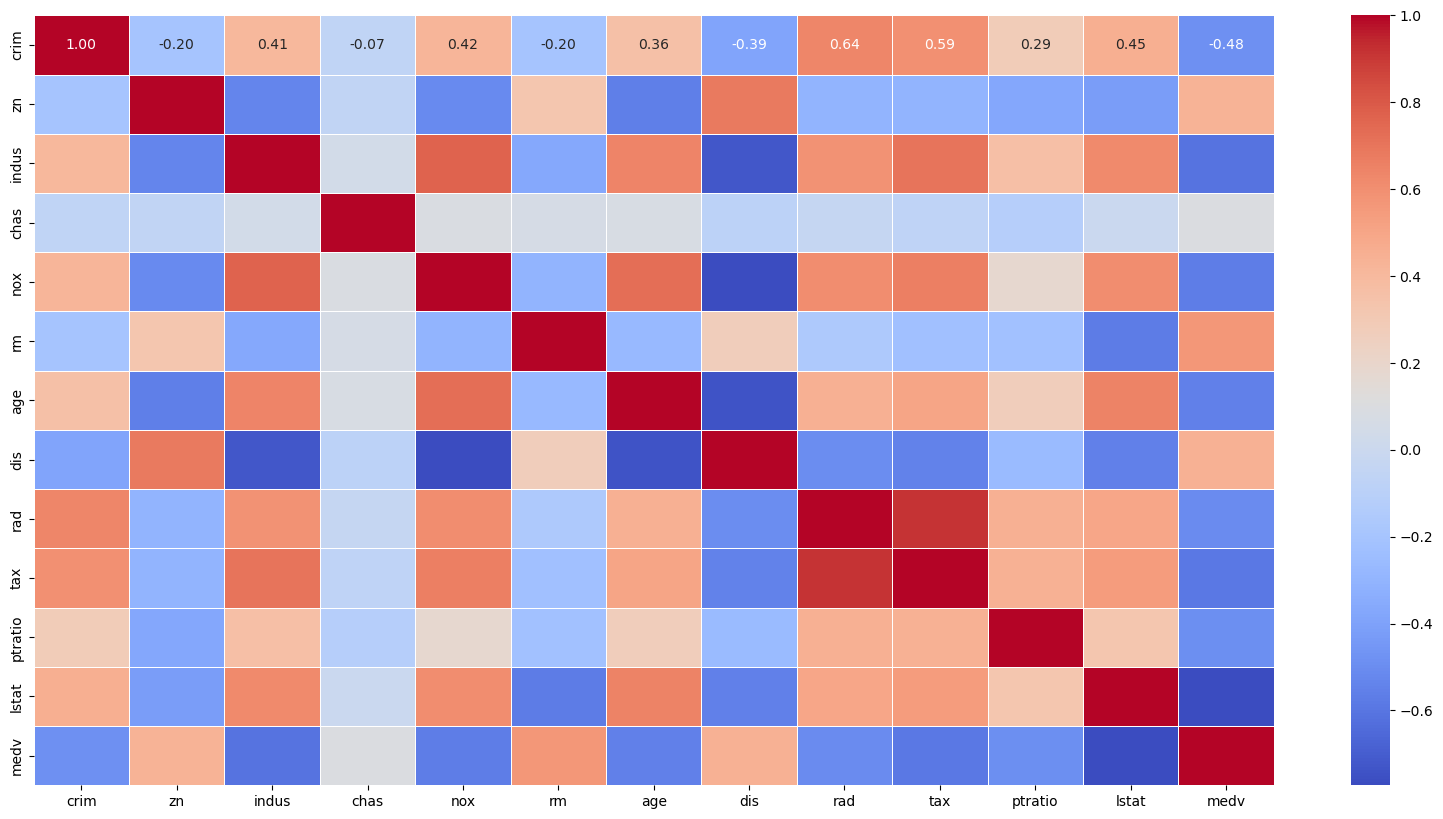

In [84]:
# Set the figure size (20 inches by 10 inches)
plt.figure(figsize=(20, 10))

# Generate the heatmap for the correlation matrix
sns.heatmap(filtered_df.corr(), annot=True, fmt=".2f", annot_kws={"size": 10}, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.show()

**`medv`** is highly correlated with **`rad`**,**`tax`**

In [87]:
x.describe()

rad         age         nox       lstat         dis         tax  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     0.376936    0.677307    0.353550    0.313856    0.245378    0.431498   
std      0.382277    0.288842    0.241563    0.192667    0.193357    0.321650   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.130435    0.435376    0.139918    0.161434    0.088032    0.185115   
50%      0.173913    0.768280    0.314815    0.281884    0.194285    0.282443   
75%      1.000000    0.939238    0.491770    0.423034    0.373475    0.914122   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               zn     ptratio          rm        chas        crim       indus  
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000  
mean     0.105805    0.640147    0.501750    0.060086    0.040283    0.394165  
std      0.221770    0.219497    0.110428    0.237901    0.092672    0.251626  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.510638    0.443619    0.000000    0.000859    0.181481  
50%      0.000000    0.691489    0.498659    0.000000    0.002711    0.339259  
75%      0.125000    0.808511    0.564332    0.000000    0.042140    0.642963  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

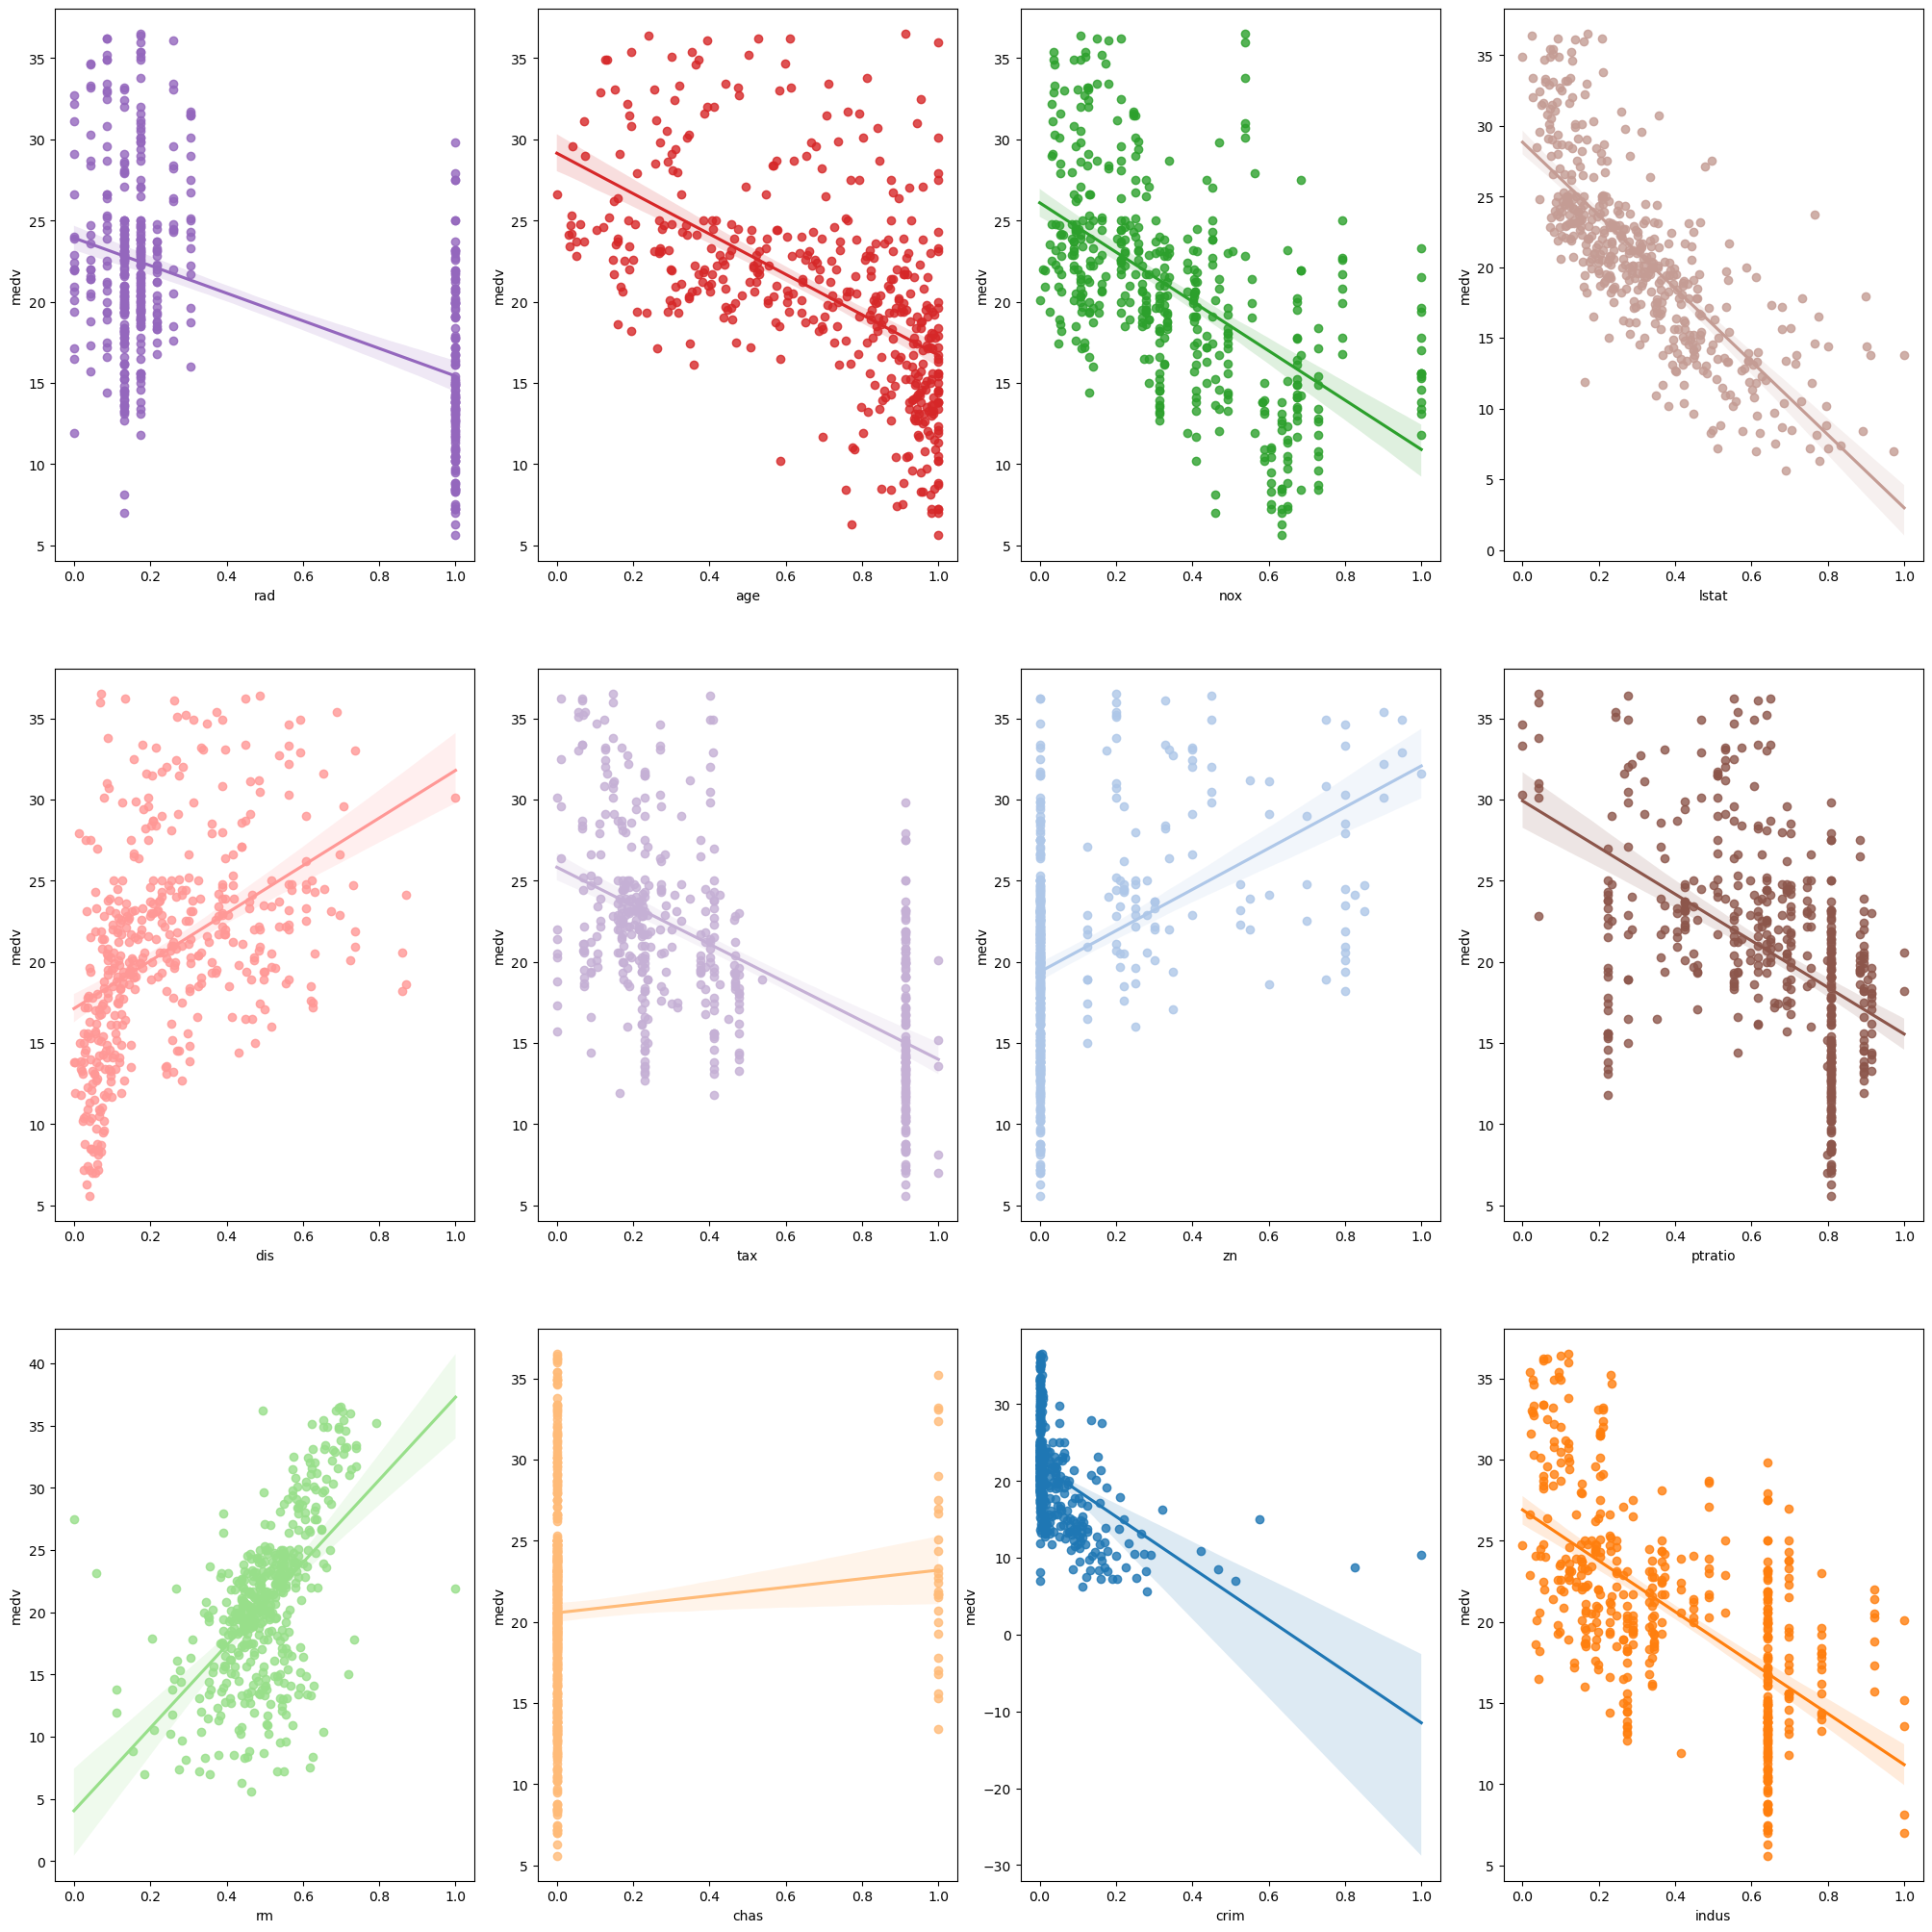

In [85]:
from sklearn import preprocessing

# Scale the features using Min-Max scaling before plotting against MEDV
min_max_scaler = preprocessing.MinMaxScaler()

# Get the feature columns excluding 'medv'
x_columns = list(set(filtered_df.columns) - set(['medv']))

# Select features and target variable
x = filtered_df.loc[:, x_columns]
y = filtered_df['medv']

# Scale the feature columns
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=x_columns)

# Create a figure with 4 rows and 4 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each feature and create a regression plot against MEDV
for i, k in enumerate(x_columns):
    sns.regplot(y=y, x=x[k], ax=ax[i], color=color_dict.get(k, 'gray'))  # Use color_dict for color
    
# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Skewness

**Skewness** measures the asymmetry of a probability distribution relative to its mean. It tells us whether the data points are skewed or biased toward one side of the distribution. In a perfectly symmetric distribution (like a normal distribution), the skewness is **0**.

### Types of Skewness:

- **Positive skew (right skew)**: The tail on the right side of the distribution is longer or fatter. The bulk of the values (including the mean) are on the left side of the graph. Skewness is **greater than 0**.
- **Negative skew (left skew)**: The tail on the left side is longer or fatter. The bulk of the values (including the mean) are on the right side of the graph. Skewness is **less than 0**.

### Skewness Formula:

The skewness for a sample can be calculated using the following formula:

$$
\text{Skewness} = \frac{n \sum_{i=1}^{n} \left( \frac{X_i - \overline{X}}{s} \right)^3}{(n - 1)(n - 2)}
$$

Where:

- $n$ is the number of data points.
- $X_i$ is the $i$-th data point.
- $\overline{X}$ is the mean of the data.
- $s$ is the sample standard deviation:

$$
s = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \overline{X})^2}
$$

### Interpreting Skewness Values:

- **Skewness = 0**: The data is perfectly symmetrical (e.g., a normal distribution).
- **Skewness > 0**: The data is positively skewed (longer right tail).
- **Skewness < 0**: The data is negatively skewed (longer left tail).

The skewness value gives insight into the shape of the distribution:

- **Moderate skewness**: If skewness is between -0.5 and 0.5, the distribution is considered fairly symmetrical.
- **High skewness**: If skewness is between -1 and -0.5 (negatively skewed) or 0.5 and 1 (positively skewed), the distribution has moderate skew.
- **Extreme skewness**: If skewness is less than -1 or greater than 1, the distribution is highly skewed.


In [88]:
def calculate_skewness(column):
    n = len(column)  # Number of data points
    mean_val = np.mean(column)  # Mean of the column

    # Standard deviation (s)
    s = np.sqrt(np.sum((column - mean_val)**2) / (n - 1))

    # Skewness calculation
    skewness = (n * np.sum((column - mean_val)**3)) / ((n - 1) * (n - 2) * s**3)

    return skewness

In [89]:
for col in x.columns:
    print(f"Column: {col}, Custom Skewness: {calculate_skewness(x[col])}, Pandas Skewness: {x[col].skew()}")

Column: rad, Custom Skewness: 0.9686813515217759, Pandas Skewness: 0.9686813515217759
Column: age, Custom Skewness: -0.6033380622162149, Pandas Skewness: -0.6033380622162147
Column: nox, Custom Skewness: 0.7345521044051755, Pandas Skewness: 0.7345521044051754
Column: lstat, Custom Skewness: 0.9218938386823149, Pandas Skewness: 0.9218938386823149
Column: dis, Custom Skewness: 1.0041777959687785, Pandas Skewness: 1.0041777959687783
Column: tax, Custom Skewness: 0.6384104628176596, Pandas Skewness: 0.6384104628176599
Column: zn, Custom Skewness: 2.2934196307776586, Pandas Skewness: 2.293419630777658
Column: ptratio, Custom Skewness: -0.8679538664834395, Pandas Skewness: -0.8679538664834395
Column: rm, Custom Skewness: -0.36510746040303516, Pandas Skewness: -0.3651074604030351
Column: chas, Custom Skewness: 3.7142338189699324, Pandas Skewness: 3.714233818969932
Column: crim, Custom Skewness: 5.268174981804852, Pandas Skewness: 5.268174981804852
Column: indus, Custom Skewness: 0.27114268039

In [90]:
print(f"Column: {'medv'}, Custom Skewness: {calculate_skewness(y)}, Pandas Skewness: {y.skew()}")

Column: medv, Custom Skewness: 0.20256283436312944, Pandas Skewness: 0.20256283436312952


In [91]:
log_trans_col = []
for col in x.columns:
    if col != 'chas':
        if np.abs(x[col].skew()) > 0.5:
            print(col)
            log_trans_col.append(col)
            x[col] = np.log1p(x[col])

rad
age
nox
lstat
dis
tax
zn
ptratio
crim


In [93]:
x

rad       age       nox     lstat       dis       tax        zn  \
0    0.000000  0.495675  0.273696  0.080064  0.238001  0.188979  0.165514   
1    0.042560  0.578128  0.159428  0.181441  0.299010  0.099811  0.000000   
2    0.042560  0.469617  0.159428  0.055397  0.299010  0.099811  0.000000   
3    0.083382  0.365901  0.139941  0.026325  0.370303  0.064658  0.000000   
4    0.083382  0.424170  0.139941  0.089001  0.370303  0.064658  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
461  0.000000  0.519848  0.327021  0.193649  0.115184  0.151967  0.000000   
462  0.000000  0.565337  0.327021  0.180050  0.099566  0.151967  0.000000   
463  0.000000  0.645695  0.327021  0.096850  0.089632  0.151967  0.000000   
464  0.000000  0.636473  0.327021  0.117814  0.107883  0.151967  0.000000   
465  0.000000  0.589045  0.327021  0.151806  0.117323  0.151967  0.000000   

      ptratio        rm  chas      crim     indus  
0    0.252496  0.577505   0.0  0.000000  0.058148  
1    0.440312  0.547998   0.0  0.000236  0.234444  
2    0.440312  0.694386   0.0  0.000236  0.234444  
3    0.500130  0.658555   0.0  0.000293  0.053333  
4    0.500130  0.687105   0.0  0.000705  0.053333  
..        ...       ...   ...       ...       ...  
461  0.638489  0.580954   0.0  0.000633  0.414444  
462  0.638489  0.490324   0.0  0.000438  0.414444  
463  0.638489  0.654340   0.0  0.000612  0.414444  
464  0.638489  0.619467   0.0  0.001160  0.414444  
465  0.638489  0.473079   0.0  0.000462  0.414444  

[466 rows x 12 columns]

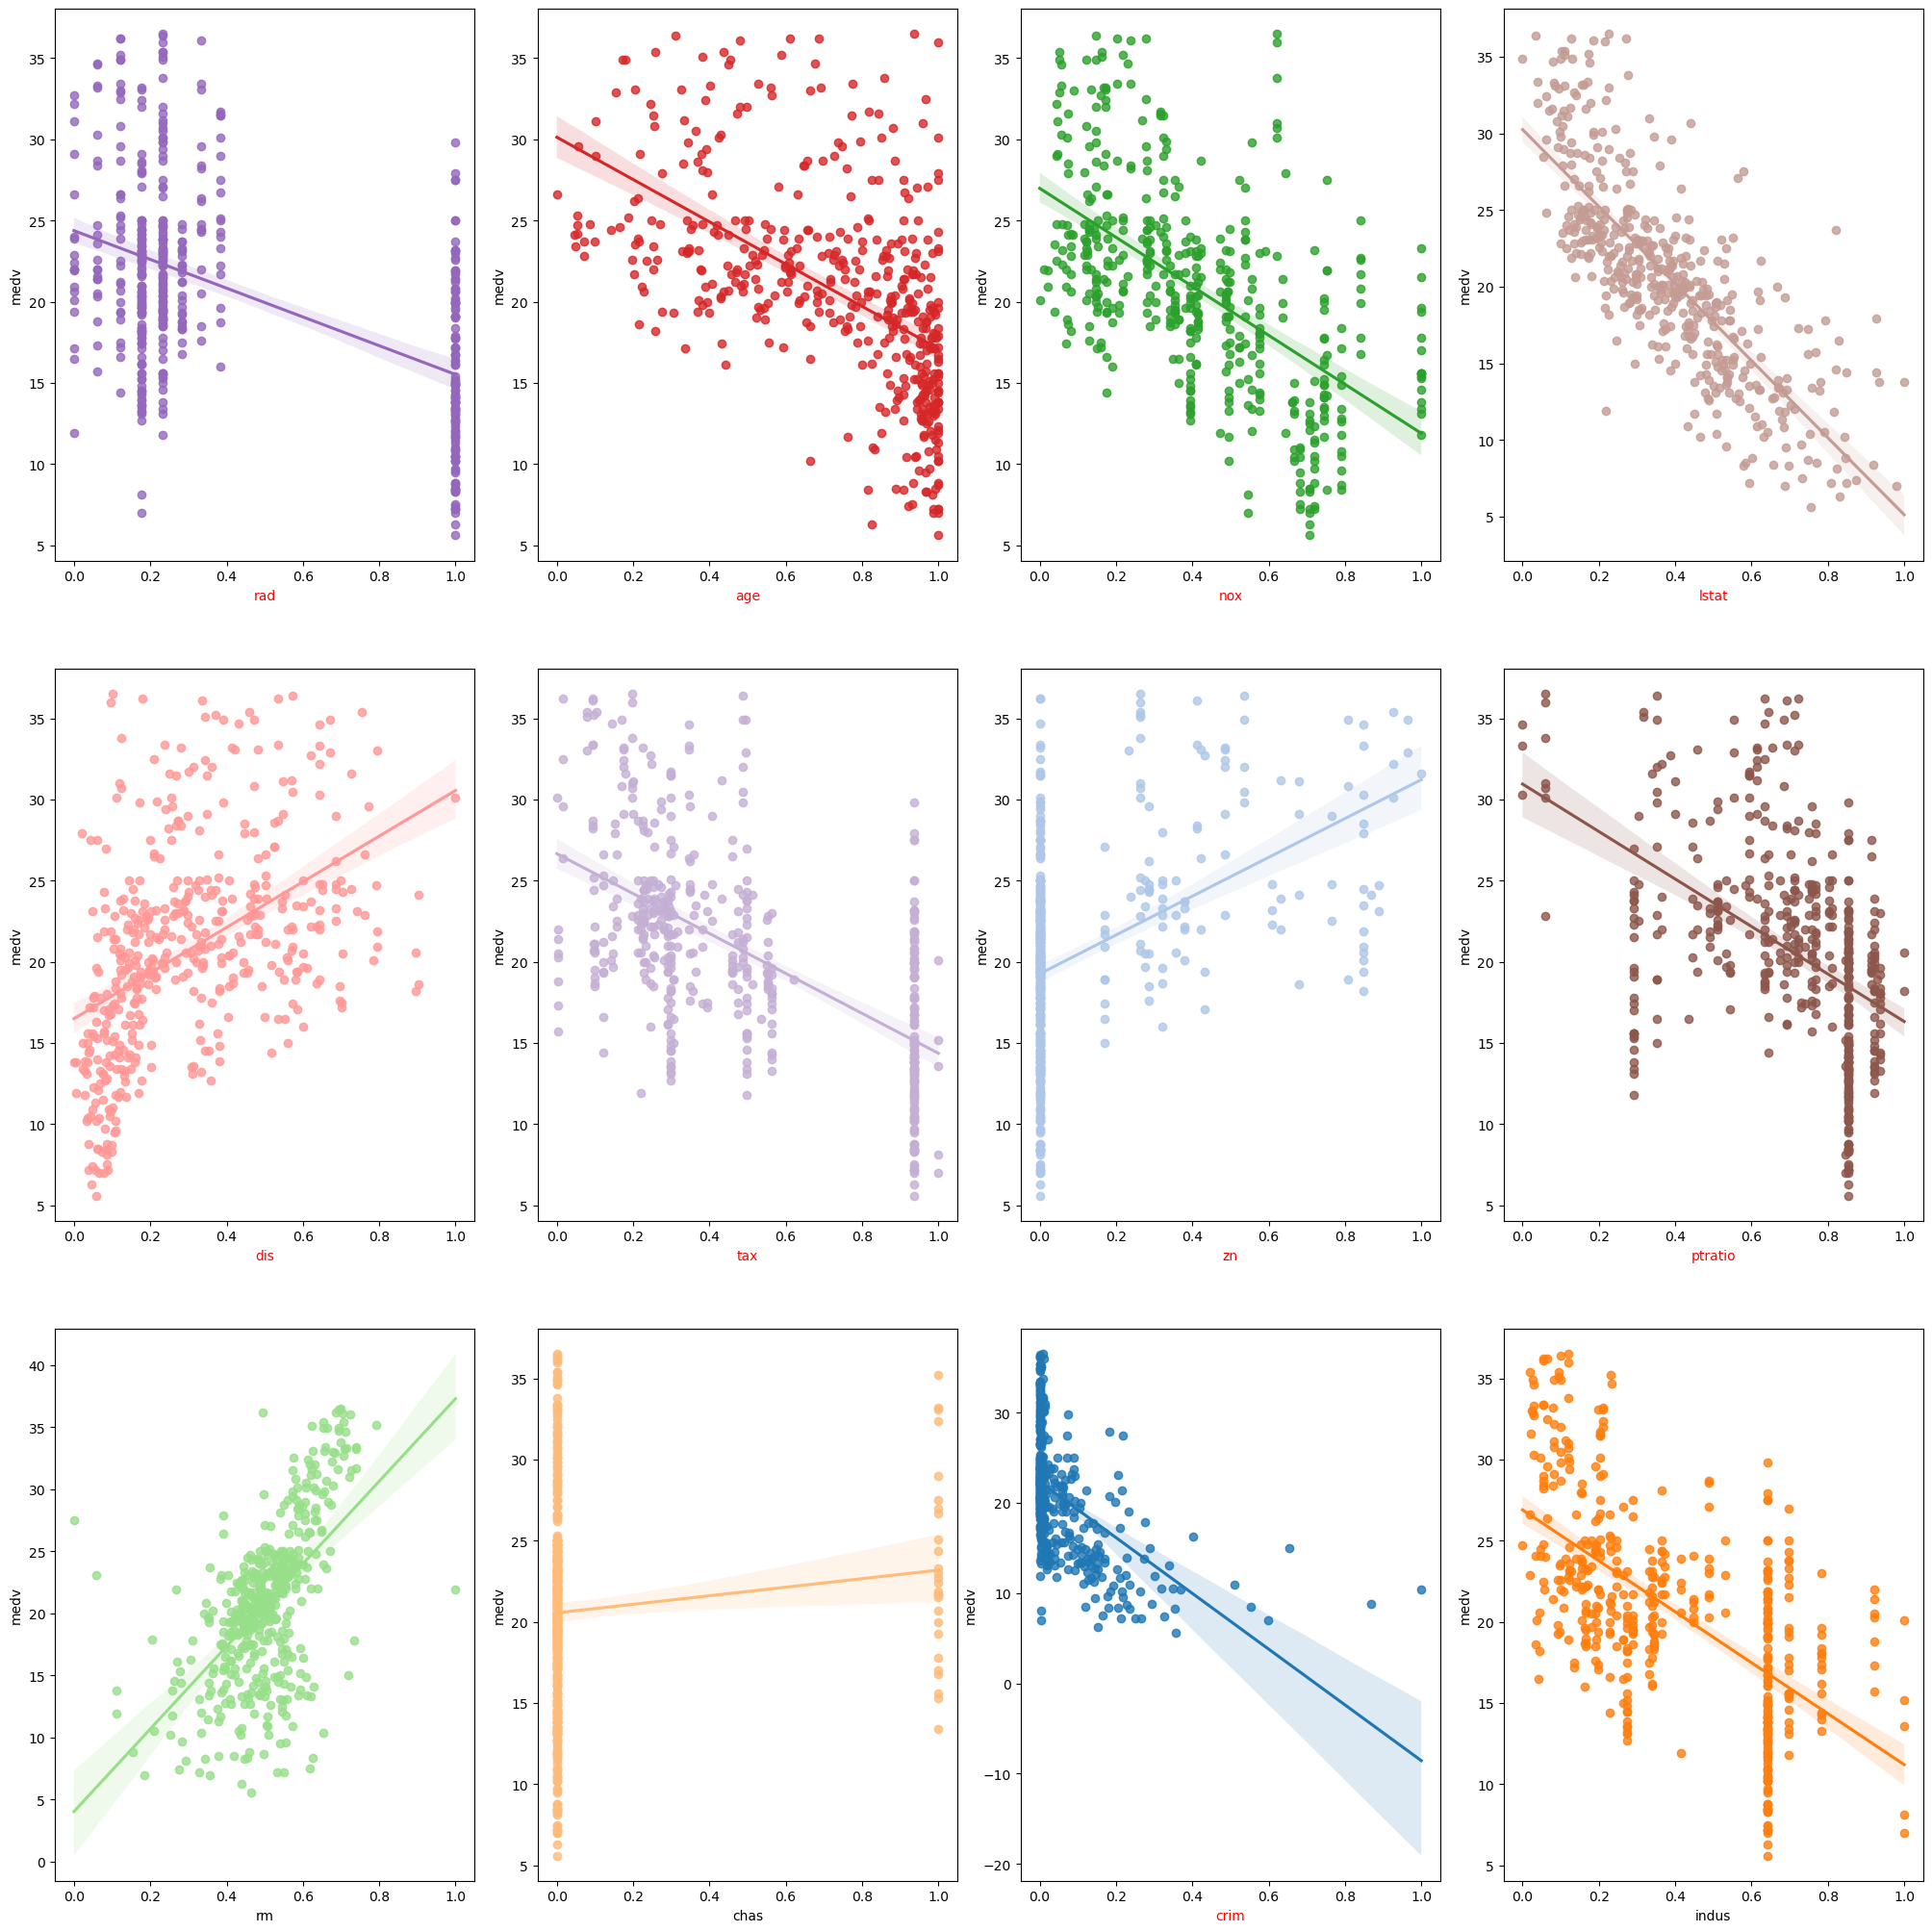

In [92]:
# Scale the features using Min-Max scaling before plotting against MEDV
min_max_scaler = preprocessing.MinMaxScaler()

# Get the feature columns excluding 'medv'
x_columns = list(set(filtered_df.columns) - set(['medv']))

# Select features and target variable
y = filtered_df['medv']

# Scale the feature columns
X = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=x_columns)

# Create a figure with 4 rows and 4 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each feature and create a regression plot against MEDV
for i, k in enumerate(x_columns):
    sns.regplot(y=y, x=X[k], ax=ax[i], color=color_dict.get(k, 'gray'))  # Use color_dict for color
    if k in log_trans_col:
        ax[i].set_xlabel(k, color = 'red')
    
# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Ordinary Least Squares (OLS)

**Ordinary Least Squares (OLS)** is a fundamental method in regression analysis used to estimate the parameters (coefficients) of a linear regression model. The goal of OLS is to find the line (or hyperplane in higher dimensions) that best fits the data **by minimizing the sum of the squared differences between the observed values and the predicted values from the model**.

### Key Concepts of OLS:

1. **Linear Regression Model**:
   The basic form of a linear regression model is:

   $$
   Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon
   $$

   Where:
   - $Y$ is the dependent variable (the outcome we're predicting).
   - $X_1, X_2, \dots, X_p$ are the independent variables (predictors).
   - $\beta_0, \beta_1, \dots, \beta_p$ are the coefficients of the model, representing the effect of each predictor on the outcome.
   - $\epsilon$ is the error term, representing the part of $Y$ that cannot be explained by the model.
<br>

2. **Objective of OLS**:
   OLS estimates the coefficients $\beta_0, \beta_1, \dots, \beta_p$ by minimizing the **sum of squared errors** (SSE). The SSE is the sum of the squared differences between the observed values $Y_i$ and the predicted values $\hat{Y}_i$ from the model:

   $$
   \text{SSE} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 = \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_{i1} + \dots + \beta_p X_{ip}))^2
   $$

   The goal is to find the values of $\beta_0, \beta_1, \dots, \beta_p$ that minimize this error.<br>
<br>

3. **Interpretation of Coefficients**:
   - **Intercept ($\beta_0$)**: The value of $Y$ when all independent variables $X_1, X_2, \dots, X_p$ are 0.
   - **Coefficients ($\beta_1, \beta_2, \dots$)**: The change in $Y$ for a one-unit increase in the corresponding independent variable, holding all other variables constant.<br>
<br>

4. **Assumptions of OLS**:
   For OLS to provide valid and reliable estimates, the following assumptions must hold:
   - **Linearity**: The relationship between the dependent and independent variables is linear.
   - **Independence**: The observations are independent of each other.
   - **Homoscedasticity**: The variance of the error term is constant across all values of the independent variables.
   - **No multicollinearity**: The independent variables are not highly correlated with each other.
   - **Normality of errors**: The error term $\epsilon$ is normally distributed.<br>
<br>

5. **OLS Solution**:
   In matrix form, OLS can be expressed as:
   $$
   \hat{\beta} = (X^TX)^{-1} X^T Y
   $$

   Where:
   - $X$ is the matrix of independent variables (including a column for the intercept).
   - $Y$ is the vector of observed values of the dependent variable.
   - $\hat{\beta}$ is the vector of estimated coefficients.
   - $X^T$ is the transpose of $X$.
   - $(X^TX)^{-1}$ is the inverse of $X^TX$.
   - $(X^TX)^{-1} X^T Y$ is called normal equation.

<br>

6. **Advantages of OLS**:
   - **Simplicity**: OLS is easy to compute and interpret, making it one of the most commonly used methods for regression analysis.
   - **Best Linear Unbiased Estimator (BLUE)**: If the assumptions of OLS hold, it provides the best (in the sense of having the smallest variance) unbiased linear estimates of the coefficients.<br>

<br>

7. **Limitations**:
   - OLS is sensitive to **outliers**, which can heavily influence the estimated coefficients.
   - If the assumptions (such as homoscedasticity or normality of errors) are violated, OLS estimates may not be reliable.<br>

### Example:

Let’s say we want to predict a person’s weight $Y$ based on their height $X_1$ and age $X_2$. The OLS model would look like:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$

We would use OLS to estimate $\beta_0$ (the intercept), $\beta_1$ (the effect of height on weight), and $\beta_2$ (the effect of age on weight). The OLS method minimizes the sum of squared differences between the observed weights and the predicted weights from the model.



In [96]:
class OLS:
    def __init__(self):
        self.coefficients = None
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        # Store X and y for later use
        self.X = X
        self.y = y
        
        # Add Intercept term (column of ones) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate the optimal coefficients using the normal equation
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self, X):
        # Add Intercept term (column of ones) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Predict using the self.coefficients
        return X_b.dot(self.coefficients)
    
    def get_coefficients(self):
        return self.coefficients

In [97]:
list(X.columns)

['rad',
 'age',
 'nox',
 'lstat',
 'dis',
 'tax',
 'zn',
 'ptratio',
 'rm',
 'chas',
 'crim',
 'indus']

In [104]:
model = OLS()
model.fit(X,y)
model.coefficients

array([ 35.59497443,   5.60257271,  -1.27266557,  -7.03290953,
       -15.02076754, -11.11563027,  -6.41925735,   2.7522286 ,
        -6.62514029,   8.04452568,   1.17177893, -10.93818265,
        -1.1313962 ])

In [106]:
model.get_coefficients()

array([ 35.59497443,   5.60257271,  -1.27266557,  -7.03290953,
       -15.02076754, -11.11563027,  -6.41925735,   2.7522286 ,
        -6.62514029,   8.04452568,   1.17177893, -10.93818265,
        -1.1313962 ])

In [107]:
model = OLS()
model.fit(X,y)
pd.DataFrame(model.coefficients, index = ['Intercept']+list(X.columns))

0
Intercept  35.594974
rad         5.602573
age        -1.272666
nox        -7.032910
lstat     -15.020768
dis       -11.115630
tax        -6.419257
zn          2.752229
ptratio    -6.625140
rm          8.044526
chas        1.171779
crim      -10.938183
indus      -1.131396

## R-squared (R²)

**R-squared (R²)**, also known as the **coefficient of determination**, is a statistical measure that explains how well the independent variables in a regression model predict the dependent variable. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.The formula for R-squared is:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}
$$

Where:
- $Y_i$ is the actual value of the dependent variable.
- $\hat{Y}_i$ is the predicted value from the regression model.
- $\bar{Y}$ is the mean of the dependent variable.
- $\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$ is the sum of squared residuals (the unexplained variance).
- $\sum_{i=1}^{n} (Y_i - \bar{Y})^2$ is the total sum of squares (the total variance in the data).

### Interpretation of R-squared:

- **R² = 1**: The model perfectly fits the data, meaning 100% of the variance in the dependent variable is explained by the independent variables.
- **R² = 0**: The model does not explain any of the variance in the dependent variable.
- **R² between 0 and 1**: Indicates the proportion of variance explained by the model. For example, an R² of 0.7 means 70% of the variance in the dependent variable is explained by the model.

### Adjusted R-squared:

One limitation of R² is that it increases as more independent variables are added to the model, even if those variables are not meaningful. To address this, we use **Adjusted R-squared**, which accounts for the number of predictors and adjusts for the model complexity. The formula for Adjusted R-squared is:

$$
R^2_{\text{adj}} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}
$$

Where:
- $n$ is the number of observations.
- $p$ is the number of predictors (independent variables).

Adjusted R-squared is lower than R² and only increases when the added variables improve the model significantly.

### Limitations of R-squared:

- **R-squared does not indicate causality**: A high R² does not imply that the independent variables cause changes in the dependent variable.
- **R-squared does not assess the correctness of the model**: A high R² can still be misleading if the model is not appropriate for the data.
- **Does not apply to non-linear models**: R² is primarily used in linear regression and may not work well for non-linear relationships.


In [108]:
class OLS_r(OLS):
    def r_squared(self):
        # Predict the target values
        y_pred = self.predict(self.X)
        
        # Total sum of squares (TSS): variance of the actual data
        total_sum_of_squares = np.sum((self.y - np.mean(self.y))**2)
        
        # Residual sum of squares (RSS): variance of the residuals (errors)
        residual_sum_of_squares = np.sum((self.y - y_pred)**2)
        
        # R-squared calculation
        r_squared_value = 1 - (residual_sum_of_squares / total_sum_of_squares)
        
        return r_squared_value
    
    def adjusted_r_squared(self):
        # Calculate R-squared
        r_squared_value = self.r_squared()
        
        # Number of observations (n) and number of predictors (p)
        n = self.X.shape[0]  # number of samples
        p = self.X.shape[1]  # number of features
        
        # Adjusted R-squared formula
        adj_r_squared_value = 1 - (1 - r_squared_value) * ((n - 1) / (n - p - 1))
        
        return adj_r_squared_value

In [110]:
model = OLS_r()
model.fit(X,y)
model.r_squared(), model.adjusted_r_squared()

(0.7677759527664145, 0.7616243223761209)

## Hypothesis Testing

### T-test for Coefficients in Regression

In regression analysis, after fitting a model to the data (such as Ordinary Least Squares (OLS) regression), we often want to determine whether each coefficient (or predictor) in the model is statistically significant. A **t-test** is conducted to evaluate whether each coefficient is significantly different from zero, implying that the corresponding independent variable has an impact on the dependent variable.

1. **Hypotheses**:
   - **Null Hypothesis ($H_0$)**: The coefficient is equal to zero ($\beta_i = 0$), meaning the predictor has no effect on the dependent variable.
   - **Alternative Hypothesis ($H_1$)**: The coefficient is not equal to zero ($\beta_i \neq 0$), meaning the predictor has an effect on the dependent variable.

<br>

2. **T-statistic**:
   The **t-statistic** for each coefficient is calculated as:

   $$
   t = \frac{\hat{\beta_i}}{\text{SE}(\hat{\beta_i})}
   $$

   Where:
   - $\hat{\beta_i}$ is the estimated coefficient.
   - $\text{SE}(\hat{\beta_i})$ is the standard error of the coefficient.

<br>

3. **Degrees of Freedom**:
   The degrees of freedom for the t-test in regression are calculated as:

   $$
   df = n - p - 1
   $$

   Where:
   - $n$ is the number of observations.
   - $p$ is the number of predictors.

<br>


4. **Variance-Covariance Matrix (var_cov_matrix)**:
   The **variance-covariance matrix** (denoted as `var_cov_matrix`) provides an estimate of the variability and the relationships between the estimated regression coefficients. It is essential in calculating the **standard error** of the coefficients.

   - The diagonal elements of the variance-covariance matrix give the variances of the individual coefficients, while the off-diagonal elements represent the covariances between pairs of coefficients.
   - **Formula** for the variance-covariance matrix:

   $$
   \text{Var}(\hat{\beta}) = \sigma^2 (X^T X)^{-1}
   $$

   Where:
   - $\sigma^2$ is the variance of the residuals (errors).
   - $X^T X$ is the product of the transpose of the design matrix and the design matrix itself.

   This matrix is crucial in estimating the **standard errors** of the coefficients, which are the square roots of the diagonal elements of the variance-covariance matrix:

   $$
   SE(\hat{\beta_i}) = \sqrt{\text{Var}(\hat{\beta_i})}
   $$

<br>

5. **P-value Calculation**:
   The **p-value** is calculated based on the **t-distribution** using the t-statistic and degrees of freedom.

   - For a **two-tailed test**, the p-value is calculated as:

   $$
   p = 2 \times (1 - \text{CDF}(|t|))
   $$

   Where:
   - $\text{CDF}(t)$ is the cumulative distribution function of the t-distribution, which gives the probability that a random variable is less than or equal to the given t-statistic.

<br>

6. **Interpreting the P-value**:
   - **P-value < $\alpha$** (typically 0.05): Reject the null hypothesis. The predictor is statistically significant, meaning it has a significant effect on the dependent variable.
   - **P-value > $\alpha$**: Fail to reject the null hypothesis. The predictor is not statistically significant, meaning it may not have a meaningful effect.
   


### Decision Rule:

- **If the p-value is less than the significance level (usually 0.05)**: We reject the null hypothesis, meaning that the coefficient is statistically significant, and the corresponding predictor has a significant effect on the dependent variable.
- **If the p-value is greater than the significance level**: We fail to reject the null hypothesis, meaning there isn’t enough evidence to suggest the predictor has a significant effect.


In [112]:
from scipy import stats

class OLS_h(OLS_r):
    def standard_error(self):
        # Predict the target values
        y_pred = self.predict(self.X)
        
        # Residual sum of squares (RSS)
        residual_sum_of_squares = np.sum((self.y - y_pred)**2)
        
        # Degrees of freedom
        n = self.X.shape[0]  # number of samples
        p = self.X.shape[1]  # number of features
        df = n - p - 1  # degrees of freedom
        
        # Variance of residuals (mean squared error)
        residual_variance = residual_sum_of_squares / df
        
        # Add intercept term to X
        X_b = np.c_[np.ones((self.X.shape[0], 1)), self.X]
        
        # Compute the variance-covariance matrix
        var_cov_matrix = residual_variance * np.linalg.inv(X_b.T.dot(X_b))
        
        # Standard errors are the square roots of the diagonal of the variance-covariance matrix
        standard_errors = np.sqrt(np.diag(var_cov_matrix))
        
        return standard_errors
    
    def t_statistic(self):
        # Get the standard errors of the coefficients
        standard_errors = self.standard_error()
        
        # t-statistic = coefficients / standard error
        t_stats = self.coefficients / standard_errors

        return t_stats
    
    def p_value(self):

        # Get the t-statistics
        t_stats = self.t_statistic()
        
        # Degrees of freedom
        n = self.X.shape[0]  # number of samples
        p = self.X.shape[1]  # number of features
        df = n - p - 1  # degrees of freedom
        
        # Calculate the two-tailed p-values based on the t-statistics
        p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]
        
        return np.array(p_values)

In [113]:
model = OLS_h()
model.fit(X,y)
pd.DataFrame(
    np.column_stack((model.standard_error(), model.t_statistic(), model.p_value())),
    index=['Intercept'] + (list(X.columns) if isinstance(X, pd.DataFrame) else ['X' + str(i+1) for i in range(X.shape[1])]),
    columns=['Standard Error', 't-statistic', 'p-value'])

Standard Error  t-statistic       p-value
Intercept        1.565975    22.730227  0.000000e+00
rad              1.000739     5.598434  3.754116e-08
age              0.954656    -1.333114  1.831643e-01
nox              1.361568    -5.165302  3.603647e-07
lstat            1.263619   -11.887098  0.000000e+00
dis              1.493540    -7.442473  5.013767e-13
tax              1.220500    -5.259531  2.231463e-07
zn               0.927285     2.968052  3.155744e-03
ptratio          0.887729    -7.463019  4.363176e-13
rm               1.727185     4.657593  4.210643e-06
chas             0.633413     1.849943  6.497274e-02
crim             1.963402    -5.571035  4.350666e-08
indus            1.137113    -0.994973  3.202807e-01

## Confidential Interval

### Confidence Interval Explained

A **Confidence Interval (CI)** is a range of values used to estimate an unknown population parameter (such as a mean or a regression coefficient) with a certain level of confidence. In regression analysis, a confidence interval provides a range of plausible values for the regression coefficients, helping to understand the precision of the estimates.

### Key Concepts:

1. **Confidence Level**:
   The **confidence level** represents how confident you are that the true parameter lies within the interval. Common confidence levels are 90%, 95%, and 99%.
   - A **95% confidence interval** means that if you were to draw many samples and calculate confidence intervals for each, about 95% of those intervals would contain the true population parameter.

<br>

2. **Confidence Interval Formula**:
   The general formula for a confidence interval is:

   $$
   \text{CI} = \hat{\beta} \pm t_{\alpha/2} \times \text{SE}(\hat{\beta})
   $$

   Where:
   - $\hat{\beta}$ is the estimated coefficient (or other parameter of interest).
   - $t_{\alpha/2}$ is the critical value from the **t-distribution** (for a given confidence level and degrees of freedom).
   - $\text{SE}(\hat{\beta})$ is the standard error of the coefficient estimate, which measures the variability in the estimate.

<br>

3. **Interpretation**:
   - A **95% confidence interval** for a coefficient estimate, for example, tells you that you are 95% confident that the true value of the coefficient lies within this interval.
   - For example, if the confidence interval for a coefficient $\beta_1$ is (0.5, 1.5), it means that, based on the data, we are 95% confident that the true value of $\beta_1$ lies between 0.5 and 1.5.

<br>

4. **Width of the Confidence Interval**:
   - The **width** of a confidence interval depends on the **standard error** and the **critical value** from the t-distribution. The larger the standard error, the wider the interval, meaning the estimate is less precise.
   - A **larger confidence level** (e.g., 99%) will result in a **wider interval** because you're seeking greater certainty, and thus, a broader range of plausible values.

### Example of Confidence Interval in Regression:

In a regression model, suppose we are estimating a coefficient $\hat{\beta_1}$ for the predictor variable $X_1$. Let's assume:
- $\hat{\beta_1} = 2.0$ (the estimated coefficient).
- $\text{SE}(\hat{\beta_1}) = 0.5$ (the standard error of the estimate).
- Confidence level is **95%**.
  
Using a t-table (or calculator) for a 95% confidence interval and degrees of freedom (df), we find the critical t-value $t_{0.025}$ (for a two-tailed test). Let’s assume $t_{0.025} = 2.1$.

The **confidence interval** for $\hat{\beta_1}$ is calculated as:

$$
CI = 2.0 \pm 2.1 \times 0.5
$$

So,

$$
CI = 2.0 \pm 1.05
$$

Thus, the confidence interval for $\hat{\beta_1}$ is:

$$
(0.95, 3.05)
$$

This means we are 95% confident that the true value of $\beta_1$ lies between **0.95** and **3.05**.

### Key Takeaways:
- A **confidence interval** gives a range of values within which we expect the true population parameter (e.g., a regression coefficient) to lie, given a specified level of confidence.
- A **narrower interval** indicates a more precise estimate, while a **wider interval** indicates less certainty about the estimate.
- Confidence intervals are affected by the standard error and the critical t-value, which depends on the confidence level and the sample size.

### How Confidence Intervals are Used in Regression:
- **Testing for Significance**: If the confidence interval for a coefficient does not contain **0**, it indicates that the predictor is statistically significant. For example, if a 95% confidence interval for a coefficient is (0.5, 2.5), the coefficient is significantly different from zero at the 5% level.
- **Assessing Precision**: Narrow confidence intervals suggest more precise estimates of the coefficients, while wide intervals indicate more uncertainty in the estimates.


In [114]:
class OLS_c(OLS_h):
    def residuals(self):
        y_pred = self.predict(self.X)
        return self.y - y_pred

    def fitted_values(self):
        return self.predict(self.X)
    
    def mse_resid(self):
        residuals = self.residuals()
        return np.mean(residuals ** 2)
    
    def conf_int(self, alpha=0.05):
        coeffs = self.get_coefficients()
        std_errs = self.standard_error()
        
        # Calculate the critical t-value
        n = self.X.shape[0]
        p = self.X.shape[1]
        df = n - p - 1
        t_crit = stats.t.ppf(1 - alpha / 2, df)
        
        # Calculate confidence intervals
        lower_bounds = coeffs - t_crit * std_errs
        upper_bounds = coeffs + t_crit * std_errs
        
        return np.column_stack((lower_bounds, upper_bounds))
    
    def predict_with_conf_int(self, X_new, alpha=0.05):
        y_pred = self.predict(X_new)
        n = self.X.shape[0]
        p = self.X.shape[1]
        df = n - p - 1
        se = np.sqrt(np.diag(self.standard_error()))  # Standard error of the residuals
        
        t_crit = stats.t.ppf(1 - alpha / 2, df)
        
        lower_bounds = y_pred - t_crit * se
        upper_bounds = y_pred + t_crit * se
        
        return np.column_stack((y_pred, lower_bounds, upper_bounds))
    
    def predict_with_conf_int(self, X_new, alpha=0.05):
        # Add intercept to X_new (just like we did for the training data)
        X_new = np.c_[np.ones((X_new.shape[0], 1)), X_new]

        # Get the predicted values for X_new
        y_pred = self.predict(X_new[:, 1:])  # Ignore the intercept part of X_new for prediction

        # Calculate the residual variance (mean squared error of residuals)
        mse_resid = self.mse_resid()

        # Calculate the inverse of (X^T X)
        X_b = np.c_[np.ones((self.X.shape[0], 1)), self.X]  # Add intercept to training data X
        inv_XTX = np.linalg.inv(X_b.T.dot(X_b))

        # Calculate the standard errors of the predictions
        se_pred = np.array([
            np.sqrt(mse_resid * (X_new[i].dot(inv_XTX).dot(X_new[i].T))) for i in range(X_new.shape[0])
        ])

        # Calculate the critical t-value for the confidence level
        n = self.X.shape[0]
        p = self.X.shape[1]
        df = n - p - 1
        t_crit = stats.t.ppf(1 - alpha / 2, df)

        # Calculate the lower and upper bounds of the confidence interval
        lower_bounds = y_pred - t_crit * se_pred
        upper_bounds = y_pred + t_crit * se_pred

        return np.column_stack((y_pred, lower_bounds, upper_bounds))
    
    def summary(self):
        # Collect the needed statistics
        coeffs = self.get_coefficients()
        std_errs = self.standard_error()
        t_stats = self.t_statistic()
        p_vals = self.p_value()
        r2 = self.r_squared()
        adj_r2 = self.adjusted_r_squared()
        conf_intervals = self.conf_int()

        # Header of the summary
        print("OLS Regression Results")
        print("=" * 70)
        print(f"Dependent Variable: {'y'}")
        print(f"Model: {'OLS'}")
        print(f"R-squared: {r2:.4f}")
        print(f"Adjusted R-squared: {adj_r2:.4f}")
        print("=" * 70)

        # Print coefficients, standard errors, t-statistics, p-values, and confidence intervals
        print(f"{'Variable':<12} {'Coef.':<10} {'Std.Err.':<12} {'t-stat':<10} {'P>|t|':<10} {'[0.025':<10} {'0.975]':<10}")
        print("-" * 70)

        # Print the intercept first
        print(f"{'Intercept':<12} {coeffs[0]:<10.4f} {std_errs[0]:<12.4f} {t_stats[0]:<10.4f} {p_vals[0]:<10.4f} {conf_intervals[0, 0]:<10.4f} {conf_intervals[0, 1]:<10.4f}")

        # Print the coefficients for each feature
        for i, col_name in enumerate([self.X.columns[i] for i in range(self.X.shape[1])]):
            print(f"{col_name:<12} {coeffs[i + 1]:<10.4f} {std_errs[i + 1]:<12.4f} {t_stats[i + 1]:<10.4f} {p_vals[i + 1]:<10.4f} {conf_intervals[i + 1, 0]:<10.4f} {conf_intervals[i + 1, 1]:<10.4f}")

        print("=" * 70)
        
        

In [116]:
model = OLS_c()
model.fit(X,y)
model.summary()

OLS Regression Results
Dependent Variable: y
Model: OLS
R-squared: 0.7678
Adjusted R-squared: 0.7616
Variable     Coef.      Std.Err.     t-stat     P>|t|      [0.025     0.975]    
----------------------------------------------------------------------
Intercept    35.5950    1.5660       22.7302    0.0000     32.5175    38.6725   
rad          5.6026     1.0007       5.5984     0.0000     3.6359     7.5692    
age          -1.2727    0.9547       -1.3331    0.1832     -3.1488    0.6034    
nox          -7.0329    1.3616       -5.1653    0.0000     -9.7087    -4.3571   
lstat        -15.0208   1.2636       -11.8871   0.0000     -17.5041   -12.5375  
dis          -11.1156   1.4935       -7.4425    0.0000     -14.0508   -8.1805   
tax          -6.4193    1.2205       -5.2595    0.0000     -8.8178    -4.0207   
zn           2.7522     0.9273       2.9681     0.0032     0.9299     4.5745    
ptratio      -6.6251    0.8877       -7.4630    0.0000     -8.3697    -4.8806   
rm           8.044

In [117]:
!pip install statsmodels

In [118]:
import statsmodels.api as sm

X_stat = sm.add_constant(X)  # Adds a column of ones to the feature matrix for the intercept

# Fit the model
model_stat = sm.OLS(y,np.array(X_stat))
results_stat = model_stat.fit()

# Display the summary of the model
print(results_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.40e-135
Time:                        06:45:27   Log-Likelihood:                -1189.3
No. Observations:                 466   AIC:                             2405.
Df Residuals:                     453   BIC:                             2458.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5950      1.566     22.730      0.0

## Diagnostic and Prediction

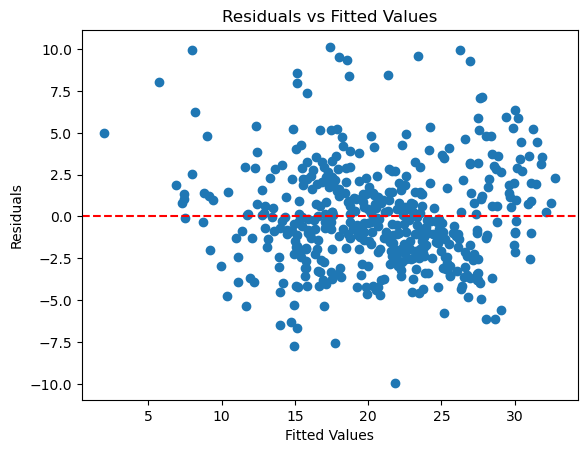

In [120]:
# Residual Plot
residuals = model.residuals()
fitted_values = model.fitted_values()

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [121]:
pred_with_conf = model.predict_with_conf_int(X)
pred_with_conf

array([[27.4298036 , 26.52742516, 28.33218205],
       [23.53944507, 22.81949348, 24.25939667],
       [27.64773148, 26.80674361, 28.48871935],
       ...,
       [24.8304286 , 23.73953427, 25.92132293],
       [23.81118074, 22.7921619 , 24.83019958],
       [21.84366075, 20.90932599, 22.77799552]])

In [122]:
def generate_synthetic_data(X, num_samples=100, dummy_columns=None):
    # Initialize an empty array to store synthetic data
    synthetic_data = np.zeros((num_samples, X.shape[1]))
    
    cols = list(X.columns)
    X = np.array(X)
    # Loop through each column in X
    for i in range(X.shape[1]):
        col = cols[i]
        if dummy_columns and col in dummy_columns:
            # For binary columns, use binomial distribution
            unique_values, counts = np.unique(X[:, i], return_counts=True)
            prob = counts[1] / np.sum(counts) if len(unique_values) > 1 else 0  # Probability of 1
            synthetic_data[:, i] = np.random.binomial(n=1, p=prob, size=num_samples)
        else:
            # For normal columns, use normal distribution
            print()
            mean = np.mean(X[:, i])  # Calculate mean of the column
            std_dev = np.std(X[:, i])  # Calculate standard deviation of the column
            synthetic_data[:, i] = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
    
    return synthetic_data
X_new = pd.DataFrame(generate_synthetic_data(X,100,['chas']), columns = X.columns)
X_new.head()

rad       age       nox     lstat       dis       tax        zn  \
0  0.318442  0.797656  0.335457  0.135611  0.125474  0.263332  0.297184   
1 -0.039726  0.965576  0.177669  0.169765  0.537460  0.435854  0.215339   
2 -0.155489  0.866634  0.398566  0.318876  0.162405  0.736355 -0.001458   
3 -0.202179  1.157284  0.798582  0.120464  0.537644  0.879478  0.360132   
4  0.165042  0.670995  0.178394  0.345263  0.388583 -0.018653  0.283346   

    ptratio        rm  chas      crim     indus  
0  0.987477  0.661768   1.0  0.155061  0.066080  
1  0.389699  0.378203   0.0  0.017230  0.875435  
2  0.766435  0.447649   0.0  0.108228  0.339642  
3  0.890959  0.566977   0.0  0.193481  0.146906  
4  0.381342  0.397294   0.0 -0.117127  0.537390

In [124]:
X_new = X.copy()

In [125]:
# Make predictions with confidence intervals
pred_with_conf = model.predict_with_conf_int(X_new)

# Display predictions with confidence intervals
print("Predictions with Confidence Intervals:")
prediction = pd.DataFrame(pred_with_conf, columns=['Prediction', 'Lower Bound', 'Upper Bound'])
prediction

Predictions with Confidence Intervals:


Prediction  Lower Bound  Upper Bound
0     27.429804    26.527425    28.332182
1     23.539445    22.819493    24.259397
2     27.647731    26.806744    28.488719
3     27.522144    26.637410    28.406877
4     26.280106    25.384805    27.175407
..          ...          ...          ...
461   21.963355    21.052750    22.873959
462   21.699005    20.801790    22.596220
463   24.830429    23.739534    25.921323
464   23.811181    22.792162    24.830200
465   21.843661    20.909326    22.777996

[466 rows x 3 columns]

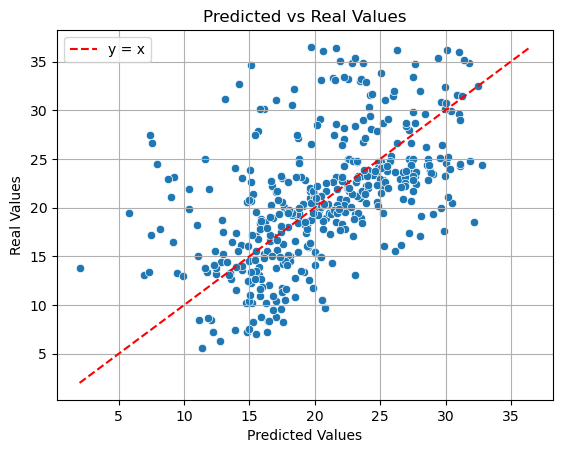

In [126]:
prediction['real'] = y
prediction['fitted'] = fitted_values

# Create the scatter plot using Seaborn
sns.scatterplot(x='Prediction', y='real', data=prediction)

# Add the y = x line
min_val = min(prediction['Prediction'].min(), prediction['real'].min())
max_val = max(prediction['Prediction'].max(), prediction['real'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

# Optionally add labels, title, and legend
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Predicted vs Real Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [127]:
X_new = pd.DataFrame(generate_synthetic_data(X,500,['chas']), columns = X.columns)
pred_with_conf = model.predict_with_conf_int(X_new)
prediction = pd.DataFrame(pred_with_conf, columns=['Prediction', 'Lower Bound', 'Upper Bound'])

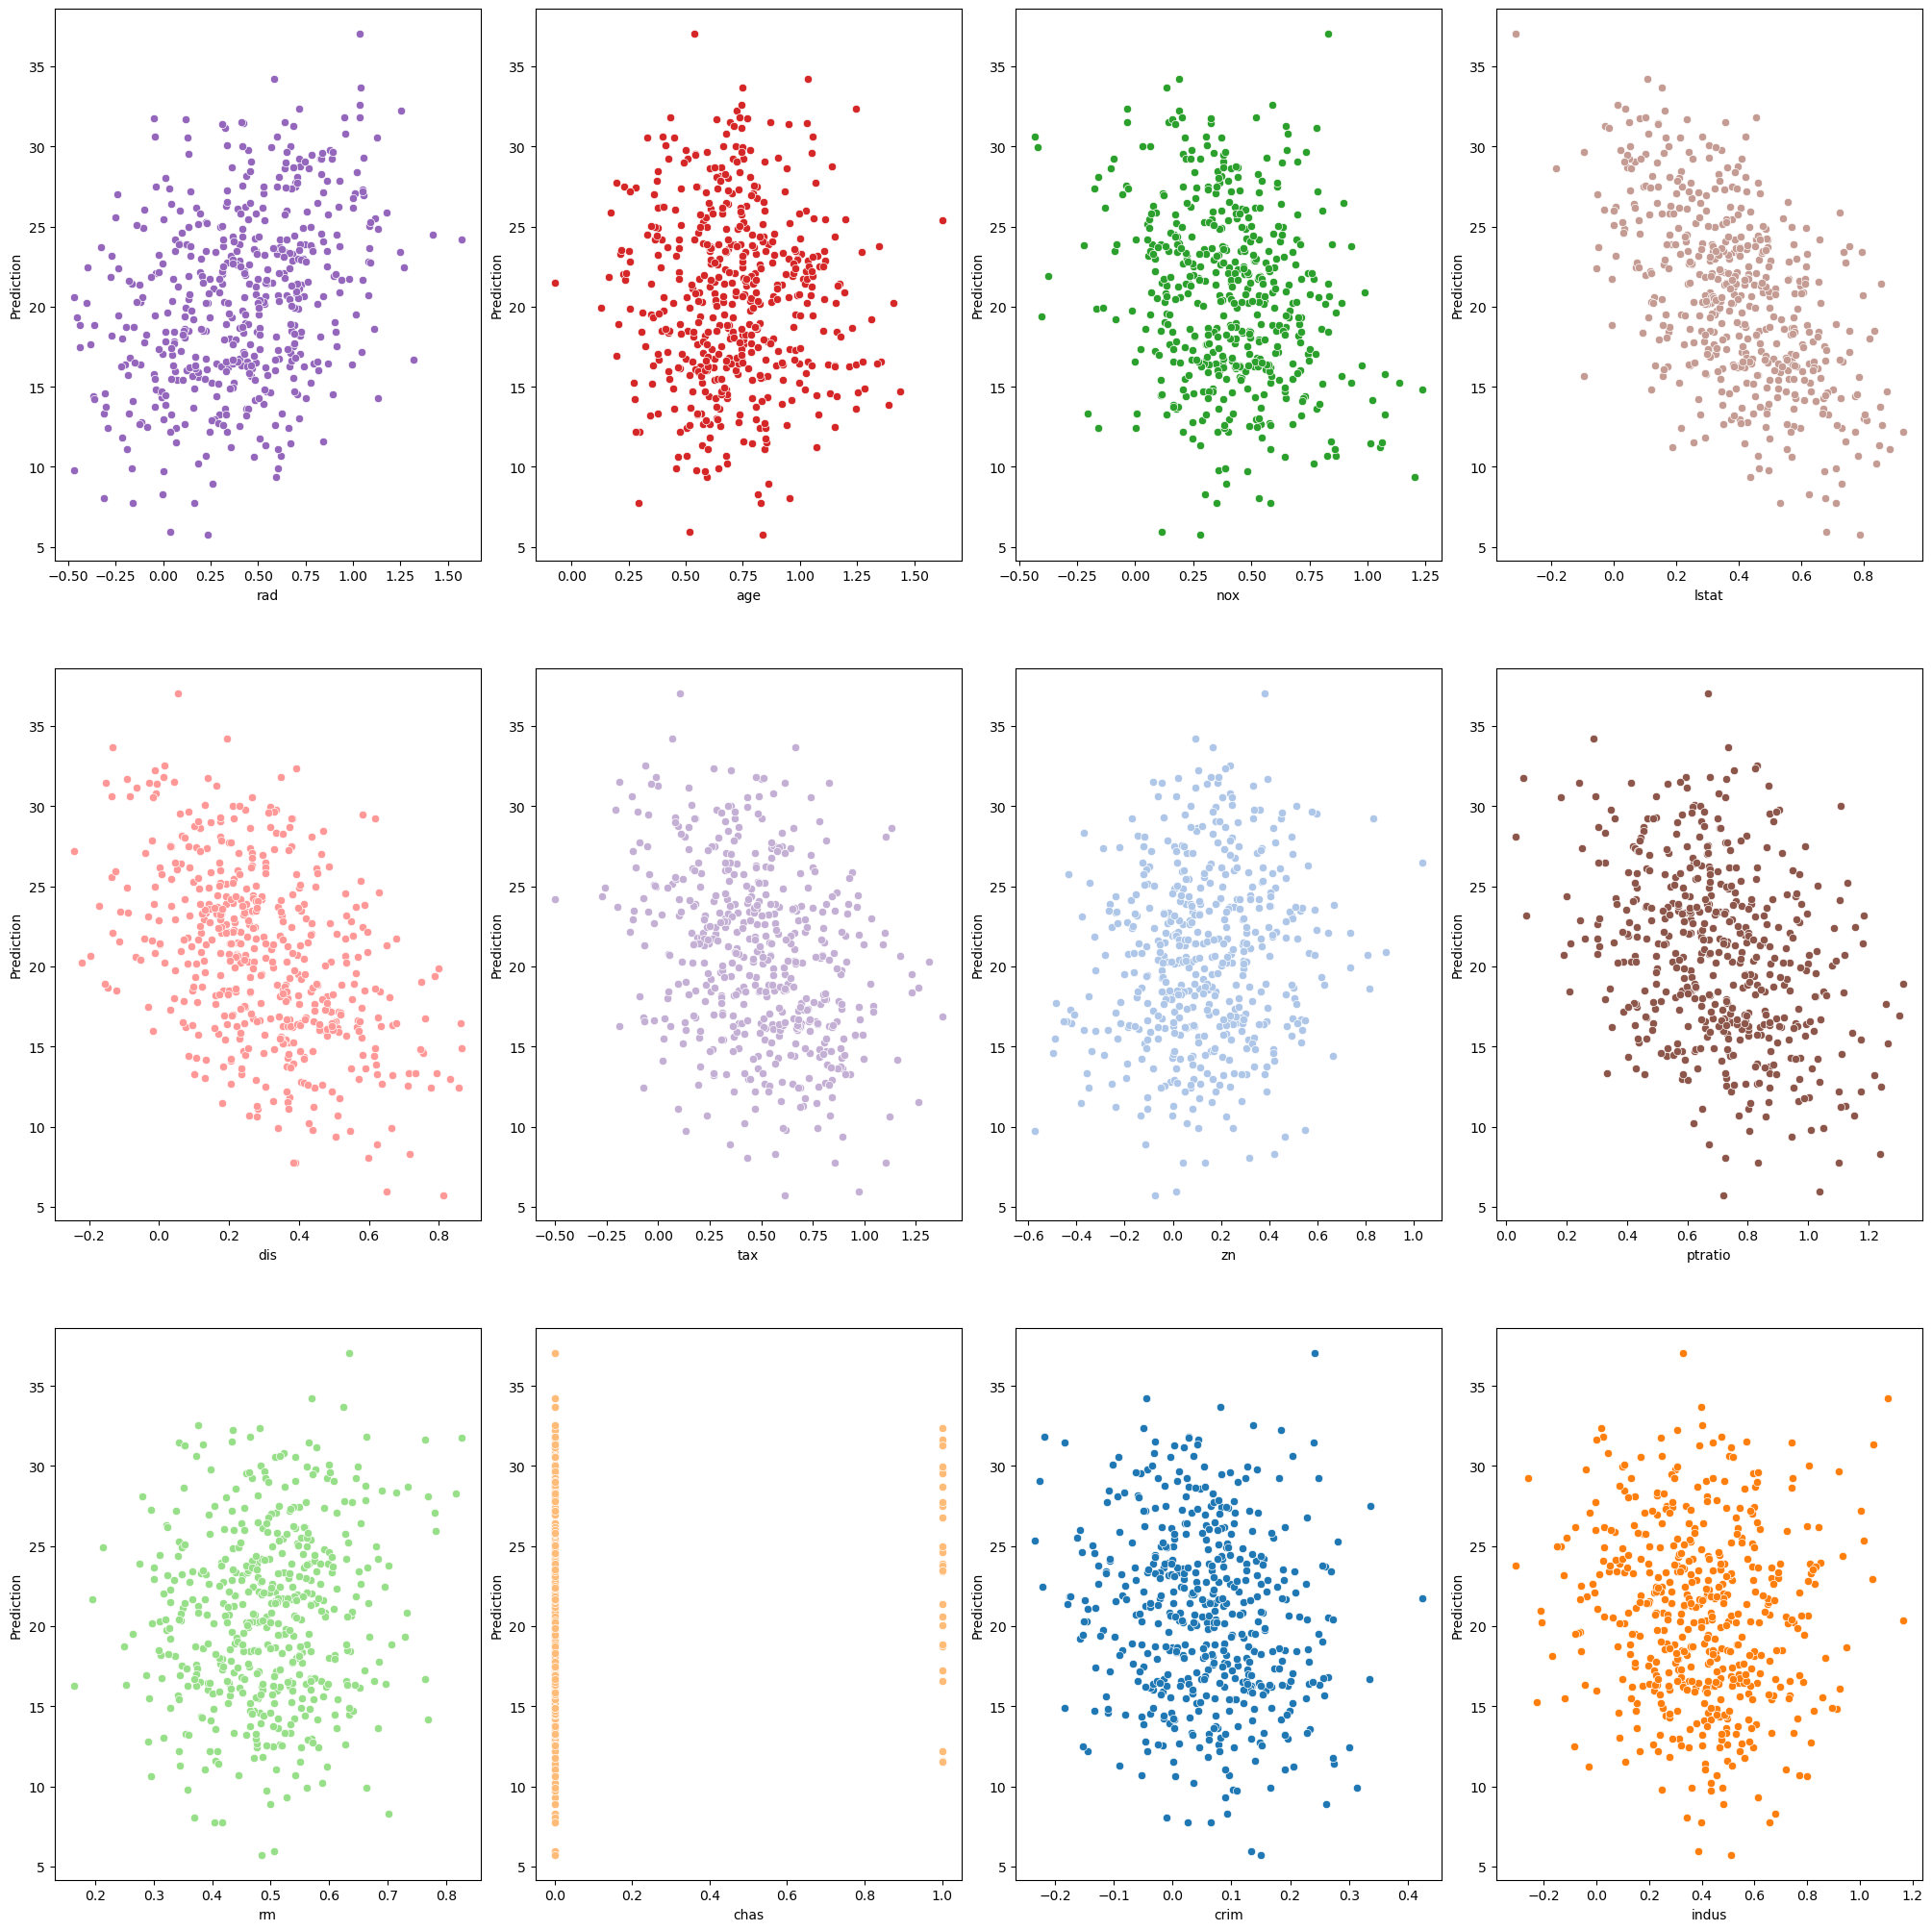

In [129]:
# Select features and target variable
y = prediction['Prediction']
y_upper = prediction['Upper Bound']
y_lower = prediction['Lower Bound']

# Create a figure with 4 rows and 4 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each feature and create a regression plot against MEDV
for i, k in enumerate(x_columns):
    sns.scatterplot(y=y, x=X_new[k], ax=ax[i], color=color_dict.get(k, 'gray'))  # Use color_dict for color
    
# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

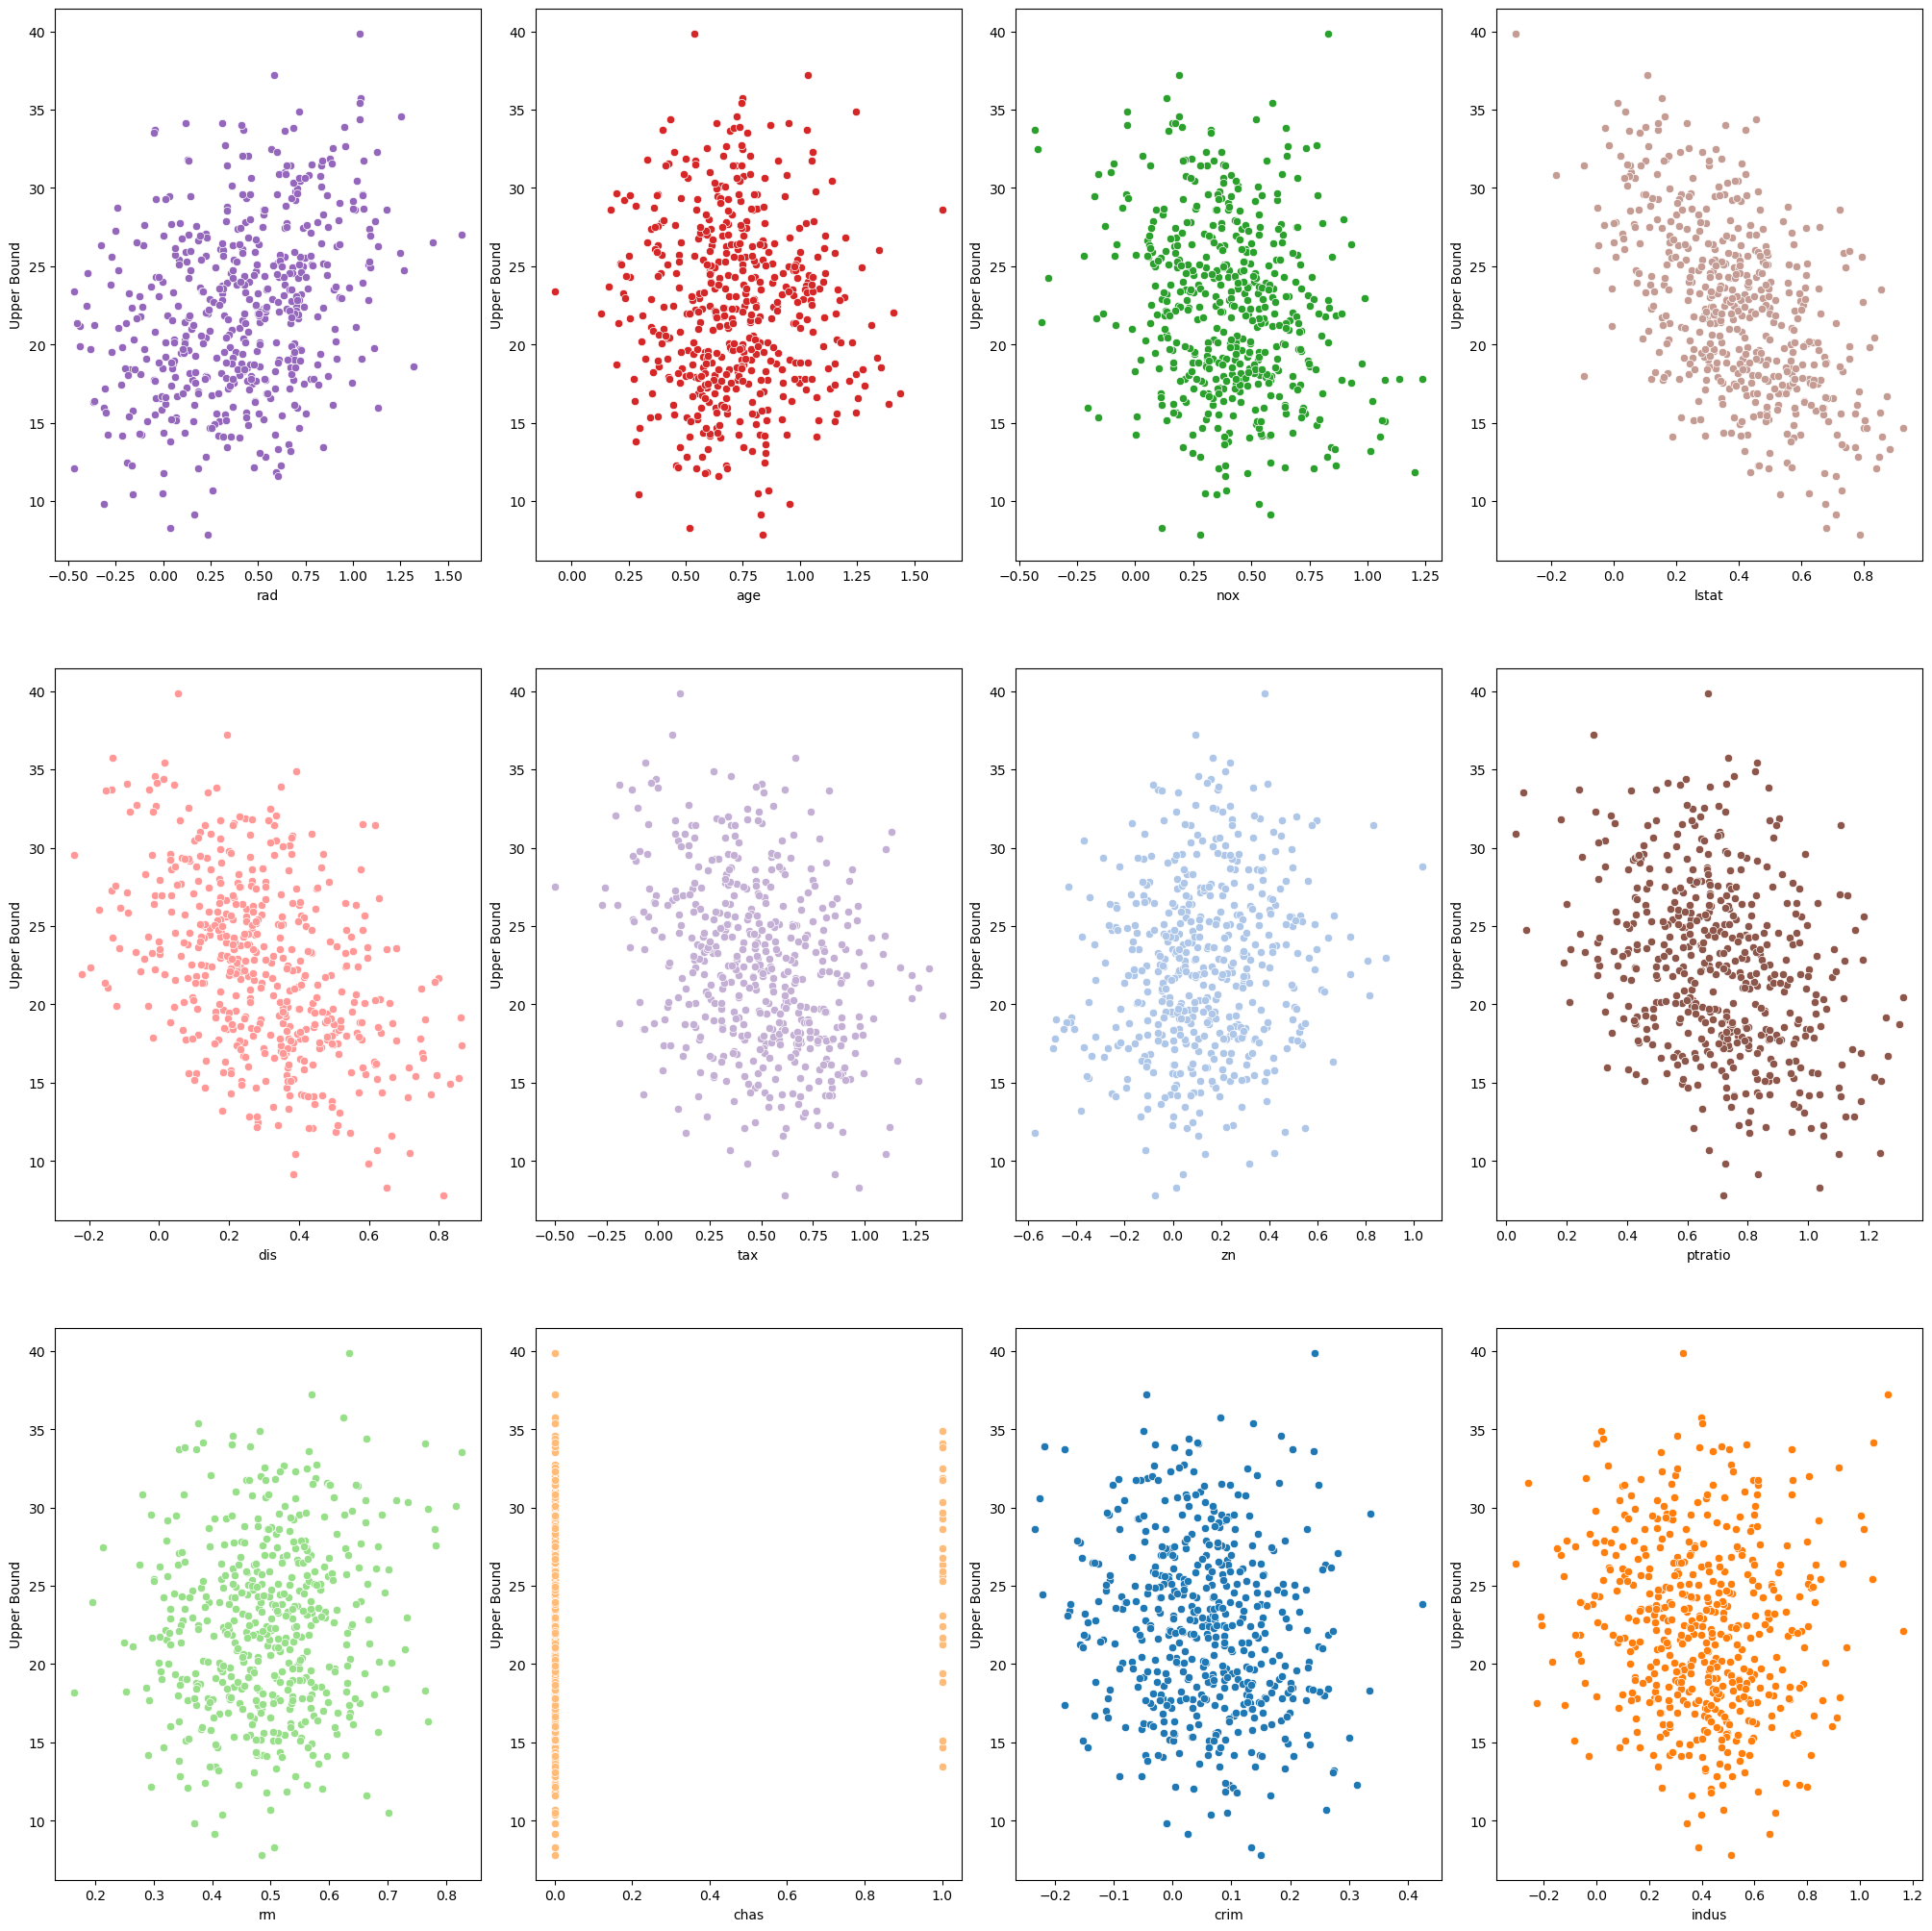

In [130]:
# Select features and target variable
y = prediction['Upper Bound']

# Create a figure with 4 rows and 4 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each feature and create a regression plot against MEDV
for i, k in enumerate(x_columns):
    sns.scatterplot(y=y, x=X_new[k], ax=ax[i], color=color_dict.get(k, 'gray'))  # Use color_dict for color
    
# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

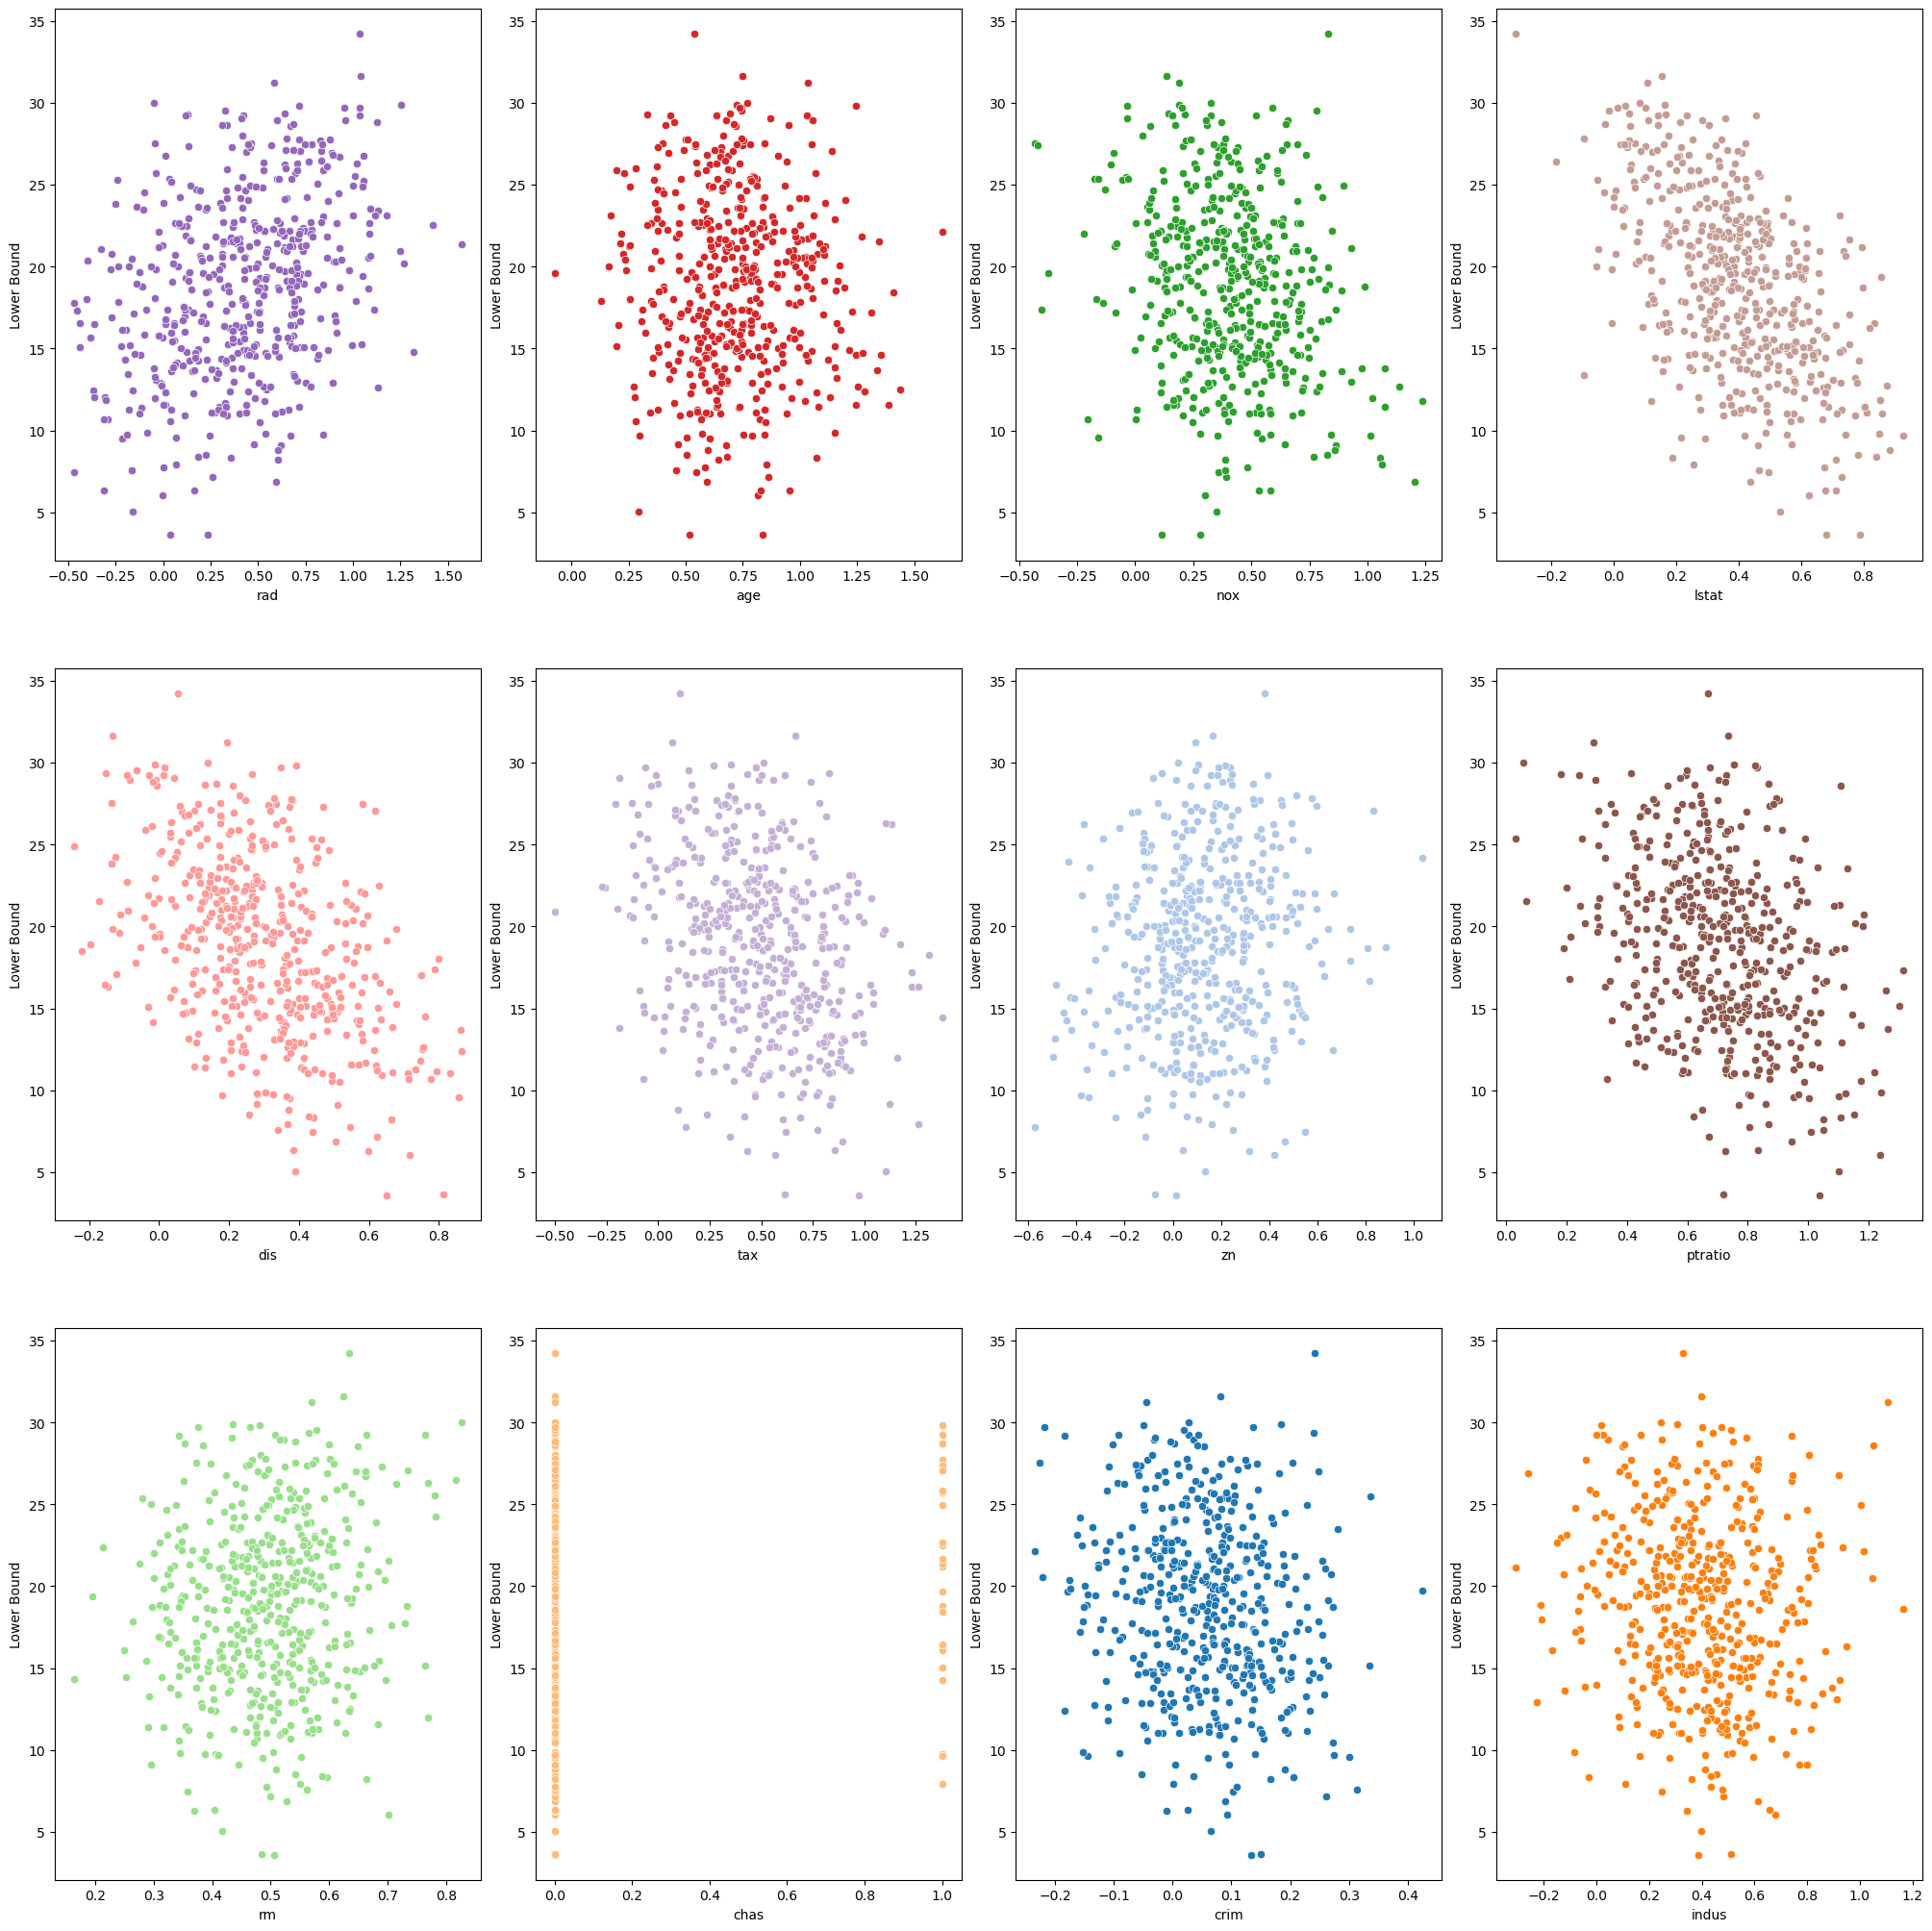

In [131]:
# Select features and target variable
y = prediction['Lower Bound']

# Create a figure with 4 rows and 4 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each feature and create a regression plot against MEDV
for i, k in enumerate(x_columns):
    sns.scatterplot(y=y, x=X_new[k], ax=ax[i], color=color_dict.get(k, 'gray'))  # Use color_dict for color
    
# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Bias-Variance Trade-Off

The **bias-variance trade-off** is related to the model’s complexity and how well it generalizes to unseen data in OLS regression.

- **Bias**: Refers to errors due to overly simplistic models that may not capture the true relationship between the independent variables (features) and the target variable. In linear regression, a model with high bias might underfit the data.
- **Variance**: Refers to errors due to a model being too complex, capturing the noise or random fluctuations in the training data rather than the underlying pattern. This leads to overfitting, where the model performs very well on training data but poorly on unseen test data.

### Low Bias, High Variance

You can create a complex model (for example, using a high-degree polynomial regression & large model) that fits the training data very well. This model will have low bias but high variance, leading to overfitting.

### High Bias, Low Variance

A simple linear model might underfit the data if the relationship is more complex than a straight line. This will have high bias but low variance.

### The Trade-Off

- **High Bias, Low Variance**: A simple model (like a linear regression) is likely to have high bias because it underfits the data but will have low variance as it doesn’t change much with different training data.
  
- **Low Bias, High Variance**: A complex model (like a deep neural network or a high-degree polynomial) will have low bias because it fits the training data very well but will have high variance as it is sensitive to fluctuations and noise in the training data.

The trade-off is finding the **right model complexity** that minimizes both bias and variance. A model that balances bias and variance is more likely to **generalize** well to new, unseen data.

Here's a typical illustration of the **bias-variance trade-off**:

- As model complexity increases:
  - **Bias decreases**: The model fits the training data better.
  - **Variance increases**: The model becomes more sensitive to small variations in the training data.

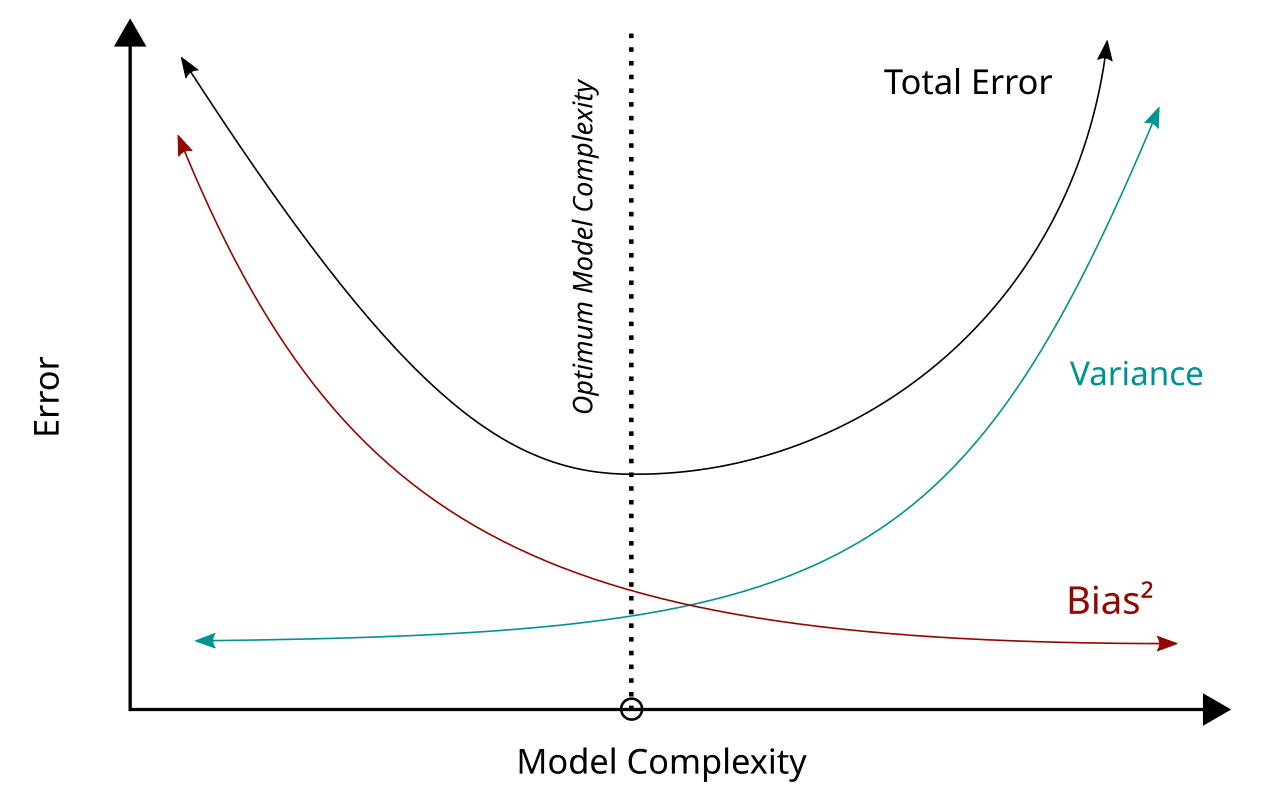


# Lasso Regression


## Bias-Variance Trade-Off in Linear Models

The **bias-variance trade-off** can be illustrated by comparing a **linear model with many variables** versus a **linear model with fewer variables**.


### Linear Model with Many Variables (High Complexity)
   
A linear regression model with many variables (features) tends to be more **complex**, meaning it can better fit the training data by capturing more of the underlying relationships. However, this increased complexity comes with its own risks in terms of **bias** and **variance**:

- **Low Bias**: 
   - With many variables, the model is flexible enough to capture most of the patterns in the training data, leading to **low bias**. This means the model is less likely to underfit because it can closely match the data.
   - However, if some variables are irrelevant or contain noise, the model might end up fitting not only the true relationships but also random fluctuations in the data.
   
- **High Variance**: 
   - The problem with adding too many variables is that the model becomes more sensitive to small changes in the data. If the training data contains noise or irrelevant information, the model might "learn" this noise, leading to **overfitting**.
   - As a result, while the model performs well on the training data, its performance might degrade significantly on unseen (test) data. This is because the model has high **variance**, meaning its predictions fluctuate based on the particular data points it was trained on.

### Example of High Variance in Complex Models

Suppose you have 100 features, but only 10 of those features truly influence the outcome. By fitting a linear model with all 100 features, the model may learn patterns from the 90 irrelevant features, overfitting the data and resulting in high variance when applied to new data.

### Linear Model with Fewer Variables (Low Complexity)

A linear regression model with fewer variables is **simpler** and less flexible. While this model is less prone to overfitting, it may also struggle to capture all the important patterns in the data, leading to a different trade-off between bias and variance:

- **High Bias**: 
   - With fewer variables, the model is less flexible, which means it may not fully capture the complexity of the true relationship between the variables and the target. This can lead to **underfitting**, where the model is too simple to represent the data well.
   - As a result, the model has **high bias** — it consistently makes errors because it can't fully model the underlying data-generating process.

- **Low Variance**: 
   - Since the model is simpler, it is less sensitive to small changes in the data. This means that even if the training data changes slightly, the model’s predictions won’t fluctuate much. In other words, the model is **more stable** and has **low variance**.
   - While this means the model is less likely to overfit, it also means it may miss some important patterns, reducing its ability to generalize to more complex data.

### Example of High Bias in Simple Models

Suppose you fit a linear regression model with only 3 features out of the 10 important ones. The model will not have enough information to capture the true relationship between the variables and the target, leading to **underfitting** and a consistently higher error on both training and test data.

### Summary of Trade-Off

| Model Type          | Bias               | Variance           | Description                                                 |
|---------------------|--------------------|--------------------|-------------------------------------------------------------|
| **Many Variables**   | Low bias           | High variance       | The model captures most patterns in the data, but risks overfitting and generalizes poorly to new data. |
| **Fewer Variables**  | High bias          | Low variance        | The model is too simple to capture complex patterns, leading to underfitting, but it generalizes more consistently. |

### Finding the Right Balance

The **bias-variance trade-off** is about **finding the right number of variables in the model** — too many variables lead to high variance (overfitting), while too few lead to high bias (underfitting).


## <span style = "color:blue">Lasso Regression (L1 Regularization) </span>

### What is Lasso Regression?

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses **L1 regularization**. It is used to enhance the generalization of the model by adding a penalty to the cost function. This penalty is proportional to the absolute value of the coefficients.

The key benefit of Lasso Regression is that it performs **feature selection (variable selection)** by shrinking some coefficients to zero, effectively removing less important features from the model. This helps prevent overfitting and leads to more interpretable models.

### Lasso Regression Cost Function

The cost function for Lasso Regression is a modified version of the ordinary least squares (OLS) cost function, with an additional **L1 penalty** term:

$$
\text{Lasso Loss} = \frac{1}{m}\sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} |\beta_j|
$$

Where:
- $m$ is the number of samples.
- $y_i$ is the actual value for the $i$-th sample.
- $\hat{y}_i$ is the predicted value for the $i$-th sample.
- $\beta_j$ is the coefficient for the $j$-th feature.
- $\lambda$ is the **regularization parameter** that controls the strength of the penalty.


Where:
- The first term represents the usual **mean squared error (MSE)**.
- The second term is the **L1 regularization term**, which adds a penalty proportional to the absolute value of the coefficients.

### How Lasso Regression Works

1. **L1 Regularization**: Lasso uses L1 regularization, which adds a penalty based on the absolute values of the coefficients. This encourages the model to reduce the size of some coefficients and set others to zero.
   
2. **Feature Selection**: As $\lambda$ increases, Lasso forces some of the coefficients to become exactly zero. This effectively performs **automatic feature selection**, keeping only the most important features in the model.

3. **Model Complexity**: By tuning $\lambda$, you can control the model's complexity. A small $\lambda$ results in a model similar to ordinary least squares (OLS), while a large $\lambda$ results in a simpler model with fewer features.


### Advantages of Lasso Regression

1. **Feature Selection**: Lasso performs automatic feature selection by shrinking some coefficients to exactly zero. This can lead to more interpretable models.
   
2. **Prevents Overfitting**: By adding a regularization term, Lasso reduces the risk of overfitting, especially when dealing with high-dimensional data (many features).
   
3. **Sparse Models**: Lasso tends to produce sparse models, where only the most important features are retained, making the model simpler and easier to interpret.

### Disadvantages of Lasso Regression

1. **Handling Multicollinearity**: Lasso may arbitrarily select one feature among a set of highly correlated features, ignoring others. In such cases, **Ridge Regression** or **Elastic Net** (a combination of Lasso and Ridge) may perform better.
   
2. **Feature Scaling**: Lasso is sensitive to the scale of the features. It’s important to standardize or normalize the features before applying Lasso, especially when features have different units of measurement.

### Tuning the Regularization Parameter $\lambda$

- **Small $\lambda$**: A small $\lambda$ results in minimal regularization, and the model behaves like ordinary least squares, where all features are used.
- **Large $\lambda$**: A large $\lambda$ increases the regularization strength, forcing more coefficients to zero, simplifying the model.

You can tune $\lambda$ using cross-validation to find the value that balances model complexity and performance.

### vs. Ridge Regression, Elastic Net

- **Lasso Regression**: Uses L1 regularization, which shrinks coefficients to zero and performs feature selection.
- **Ridge Regression**: Uses L2 regularization, which penalizes the sum of squared coefficients but doesn't shrink any coefficients to exactly zero, so it doesn’t perform feature selection.

$$
\text{Ridge Loss} = \frac{1}{m}\sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} \beta_j^{2}
$$

- **Elastic Net**: Uses L1 and L2 regularization both.

$$
\text{Elastic Net Loss} = \frac{1}{m}\sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda_{1}\sum_{j=1}^{n} |\beta_j| + \lambda_{2}\sum_{j=1}^{n} \beta_j^{2}
$$

In [133]:
# Select features and target variable
y = filtered_df['medv']
y = (y-np.min(y))/(np.max(y)-np.min(y))

# Scale the feature columns
X = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=x_columns)

....................................................................................................

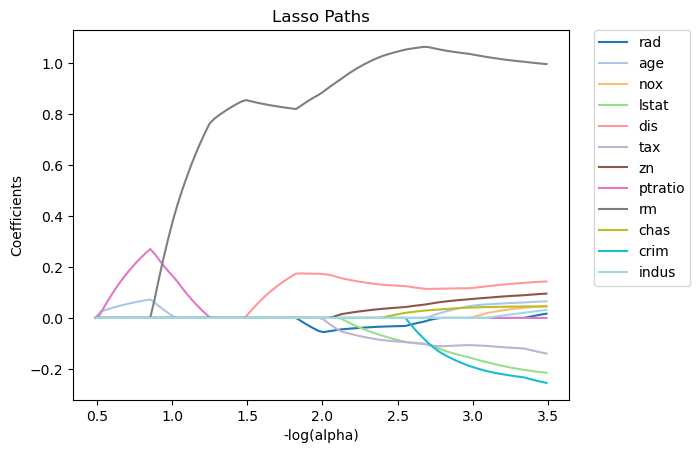

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path

# Compute the Lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, verbose=True)

# Visualize the path
plt.figure()
# Convert alpha values to log scale for better visualization
neg_log_alphas_lasso = -np.log10(alphas_lasso)

# Define colors (optional: can be automatically assigned by matplotlib as well)
colors = plt.cm.get_cmap('tab20', coefs_lasso.shape[0])  # Use 'tab20' colormap for up to 20 colors

# Plot the coefficient paths for each feature
for i, coef in enumerate(coefs_lasso):
    plt.plot(neg_log_alphas_lasso, coef, label=f'{X.columns[i]}', color=colors(i))

# Add labels, title, and legend
plt.xlabel('-log(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.axis('tight')

# Display the legend with feature labels
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Adjust legend to be outside the plot

plt.show()


In [135]:
# Convert the coefficients matrix (shape: (n_features, n_alphas)) to a DataFrame
# Transpose the matrix so that each row corresponds to an alpha value
coefs_df = pd.DataFrame(coefs_lasso.T, columns=[f'coef_{i}' for i in X.columns])

# Add the alpha values as a new column in the DataFrame
coefs_df['alpha'] = alphas_lasso

# Reorder the columns so that alpha is the first column
coefs_df = coefs_df[['alpha'] + [f'coef_{i}' for i in X.columns]]

# Display the resulting DataFrame
coefs_df

alpha  coef_rad  coef_age  coef_nox  coef_lstat  coef_dis  coef_tax  \
0   0.323212  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000   
1   0.301429  0.000000  0.024283  0.000000    0.000000  0.000000  0.000000   
2   0.281113  0.000000  0.030348  0.000000    0.000000  0.000000  0.000000   
3   0.262167  0.000000  0.036014  0.000000    0.000000  0.000000  0.000000   
4   0.244498  0.000000  0.041294  0.000000    0.000000  0.000000  0.000000   
..       ...       ...       ...       ...         ...       ...       ...   
95  0.000427  0.003414  0.061615  0.041740   -0.206041  0.138774 -0.123701   
96  0.000398  0.007149  0.062657  0.043047   -0.208592  0.140012 -0.128054   
97  0.000372  0.010561  0.063573  0.044244   -0.210943  0.141120 -0.132028   
98  0.000347  0.013771  0.064458  0.045388   -0.213152  0.142189 -0.135767   
99  0.000323  0.016747  0.065266  0.046442   -0.215202  0.143167 -0.139234   

     coef_zn  coef_ptratio   coef_rm  coef_chas  coef_crim  coef_indus  
0   0.000000      0.000000  0.000000   0.000000   0.000000    0.000000  
1   0.000000      0.014189  0.000000   0.000000   0.000000    0.000000  
2   0.000000      0.046401  0.000000   0.000000   0.000000    0.000000  
3   0.000000      0.076433  0.000000   0.000000   0.000000    0.000000  
4   0.000000      0.104445  0.000000   0.000000   0.000000    0.000000  
..       ...           ...       ...        ...        ...         ...  
95  0.090435      0.000000  1.002764   0.044995  -0.237630    0.022285  
96  0.091847      0.000000  1.000729   0.044986  -0.242416    0.024838  
97  0.093143      0.000000  0.998918   0.044986  -0.246832    0.027213  
98  0.094361      0.000000  0.997169   0.044982  -0.250974    0.029416  
99  0.095491      0.000000  0.995570   0.044980  -0.254824    0.031475  

[100 rows x 13 columns]

# Logistic Regression

**Logistic Regression** is a statistical model widely used for **binary classification tasks**, where the target variable can take on only two possible outcomes, often coded as 0 and 1. Despite its name, logistic regression is actually a classification algorithm, not a regression algorithm.

### 1. What is Logistic Regression?
Logistic Regression models the probability that a given input belongs to a certain class. For binary classification, it predicts the probability of the positive class (class 1) versus the negative class (class 0). Unlike linear regression, logistic regression uses the **logistic function (also known as the sigmoid function)** to squeeze the output between 0 and 1, which is interpreted as the probability of belonging to class 1.

### 2. Logistic Function (Sigmoid Function)

The core idea behind logistic regression is the use of the **sigmoid function** (logistic function), which is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $z$ is the linear combination of the input features.
- The sigmoid function maps any real-valued number to a value between 0 and 1, which represents a probability.

### 3. Logistic Regression Model

Logistic regression calculates the probability that a data point belongs to the positive class ($P(y=1 \mid X)$) using a linear combination of the input features followed by the logistic function.

The model is defined as:

$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$

Where:
- $X_1, X_2, \dots, X_n$ are the features of the input data.
- $\beta_0$ is the intercept (bias).
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients (weights) of the features.

$$
\log(\frac{P(X)}{1-P(X)}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

### 4. Decision Boundary

Logistic regression outputs probabilities, but the task is to classify the input as either 0 or 1. To make a classification, we apply a **threshold** (typically 0.5):

- If $P(y = 1 \mid X) > 0.5$, predict class 1.
- If $P(y = 1 \mid X) \leq 0.5$, predict class 0.

### 5. Cost Function (Log Loss)

Logistic regression uses a special cost function called **log loss** (or **binary cross-entropy**) to train the model. This is because the mean squared error (MSE) used in linear regression does not work well for classification problems.

The **log loss** function is:

$$
\text{Log Loss} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Where:
- $m$ is the number of samples.
- $y_i$ is the true label (0 or 1).
- $p_i$ is the predicted probability for the $i$-th sample.

### 6. Optimization (Newton - Raphson Method)

The logistic regression model is trained using **gradient descent method** or **Newton-Raphson method**,where the goal is to minimize the log loss function. The parameters (weights and intercept) are updated iteratively using the gradients (partial derivatives) of the cost function.

### Key Steps in the Newton-Raphson Method for Logistic Regression:
1. **Hessian Matrix**: The second derivative (or curvature) of the cost function with respect to the parameters.
2. **Gradient**: The first derivative of the cost function.
3. **Update Rule**: In the Newton-Raphson method, the parameters are updated using the inverse of the Hessian matrix and the gradient.

### Newton-Raphson Update Formula:

The update rule for the parameters $\beta$ in Newton-Raphson is:

$$
\beta_{\text{new}} = \beta_{\text{old}} - H^{-1} g
$$

Where:
- $H$ is the **Hessian matrix** (the matrix of second-order partial derivatives of the cost function).
- $g$ is the **gradient vector** (first-order partial derivatives of the cost function).

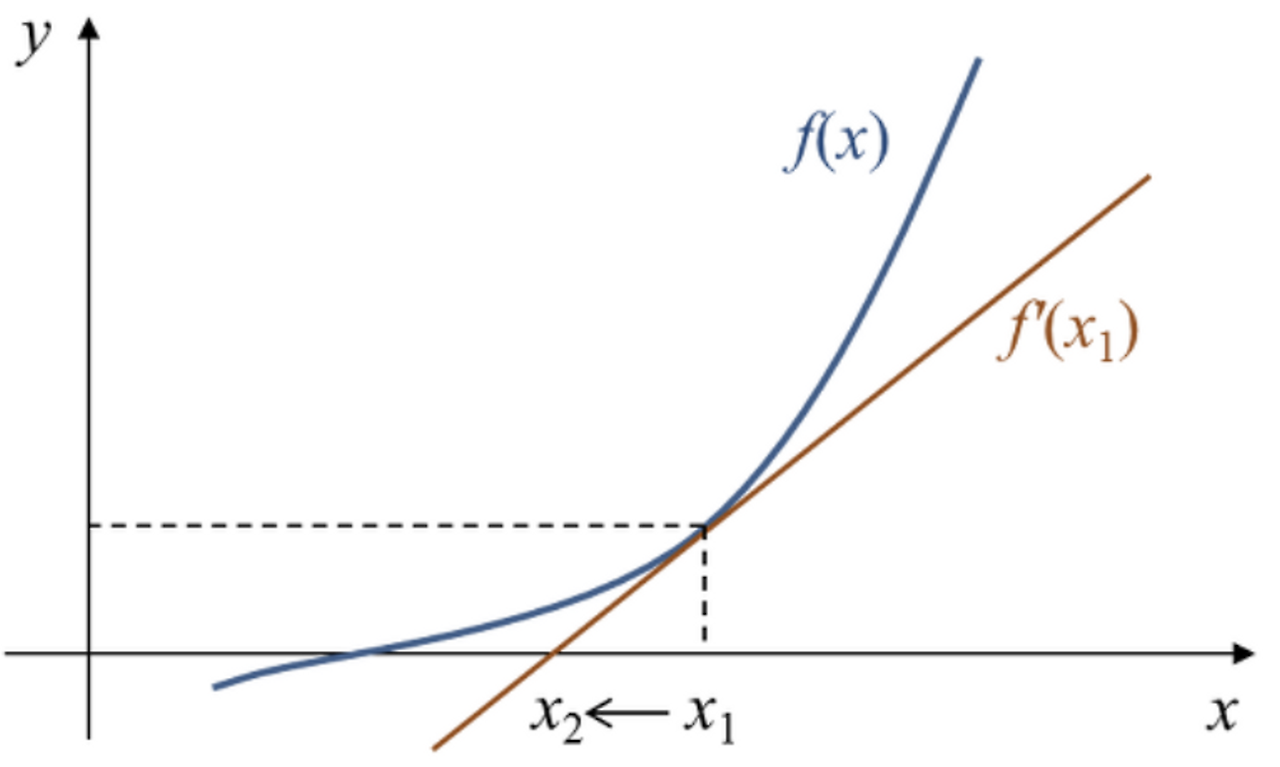

### Gradient and Hessian for Logistic Regression:

1. **Gradient** ($g$):

   The gradient of the log-likelihood function for logistic regression is:

   $$
   g = X^T (p - y)
   $$

   Where:
   - $p$ is the predicted probability vector (from the sigmoid function).
   - $y$ is the true binary label vector.
   - $X$ is the feature matrix.

<br>

2. **Hessian** ($H$):

   The Hessian matrix is given by:

   $$
   H = X^T W X
   $$

   Where:
   - $W$ is a diagonal matrix with entries $w_i = p_i (1 - p_i)$, where $p_i$ is the predicted probability for the $i$-th sample.

### <span style = "color:blue">Mathmatical Proof </span>

The Log Loss function (or binary cross-entropy loss) is defined as follows:

$$
\text{Log Loss}(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:
- $y_i$ is the actual class label (0 or 1).
- $\hat{y}_i$ is the predicted probability.
- $m$ is the number of samples.

### <span style = "color:blue">Calculating the Gradient </span>


**Definition**: The gradient is a vector of partial derivatives with respect to each parameter.

##### 3.1 Chain Rule Application

We need to find the gradient of the Log Loss with respect to $ z $:

$$
\nabla L = \frac{\partial \text{Log Loss}}{\partial z} \cdot \frac{\partial z}{\partial \beta}
$$

Where $ z = X \beta $.

##### 3.2 Differentiating Log Loss with Respect to $ \hat{y} $

First, we differentiate the Log Loss with respect to $ \hat{y} $:

$$
\frac{\partial \text{Log Loss}}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
$$

##### 3.3 Differentiating $ \hat{y} $ with Respect to $ z $

Next, we differentiate $ \hat{y} $ with respect to $ z $:

$$
\frac{\partial \hat{y}}{\partial z} = \hat{y}(1 - \hat{y})
$$

##### 3.4 Combining the Results

Using the chain rule, we have:

$$
\frac{\partial \text{Log Loss}}{\partial z} = \frac{\partial \text{Log Loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z}
$$

Substituting in the derivatives we found:

$$
\frac{\partial \text{Log Loss}}{\partial z} = \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y}(1 - \hat{y})
$$

##### 3.5 Expressing the Gradient $ \nabla L $

Finally, to find the gradient $ \nabla L $ with respect to the coefficients $ \beta $:

1. Recall that $ z = X \beta $.
2. Thus, the gradient with respect to $ \beta $ can be expressed as:

$$
\nabla L = X^T (\hat{y} - y)
$$

Here, $ (\hat{y} - y) $ represents the difference between predicted probabilities and actual outcomes.



### <span style="color:blue">Calculating the Hessian Matrix</span>

**Definition**: The Hessian matrix consists of the second-order partial derivatives with respect to each parameter.

##### 3.1 Gradient Recap

Before calculating the Hessian, recall the gradient of the Log Loss with respect to $( \beta $):

$$
\nabla L = X^T (\hat{y} - y)
$$

Where $( z = X \beta $).

##### 3.2 Differentiating the Gradient with Respect to $( \beta $)

To compute the Hessian, we differentiate the gradient with respect to $( \beta $):

$$
H = \frac{\partial \nabla L}{\partial \beta}
$$

##### 3.3 Applying the Chain Rule

Using the chain rule, we express the derivative of the gradient as:

$$
H = \frac{\partial (X^T (\hat{y} - y))}{\partial \beta}
$$

Since $( y $) is constant with respect to $( \beta $), we focus on differentiating $( \hat{y} $).

##### 3.4 Differentiating $( \hat{y} $) with Respect to $( \beta $)

Recall that:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{with} \quad z = X \beta
$$

Using the chain rule:

$$
\frac{\partial \hat{y}}{\partial \beta} = \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial \beta}
$$

Where:

$$
\frac{\partial \hat{y}}{\partial z} = \hat{y}(1 - \hat{y})
$$

And:

$$
\frac{\partial z}{\partial \beta} = X
$$

Thus, we have:

$$
\frac{\partial \hat{y}}{\partial \beta} = \hat{y}(1 - \hat{y}) X
$$

##### 3.5 Constructing the Hessian Matrix

Now substituting this derivative into our expression for the Hessian:

$$
H = X^T \frac{\partial \hat{y}}{\partial \beta} = X^T \left( \hat{y}(1 - \hat{y}) X \right)
$$

##### 3.6 Final Expression for the Hessian Matrix

Thus, the final Hessian matrix can be expressed as:

$$
H = -X^T W X
$$

Where \( W \) is defined as:

$$
W = \text{diag}(\hat{y}(1 - \hat{y}))
$$

In [136]:
filtered_df.describe()

crim          zn       indus        chas         nox          rm  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     3.590278   10.580472   11.382446    0.060086    0.556826    6.179633   
std      8.245015   22.177036    6.793901    0.237901    0.117400    0.576325   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.082757    0.000000    5.640000    0.000000    0.453000    5.876250   
50%      0.247510    0.000000    9.900000    0.000000    0.538000    6.163500   
75%      3.755472   12.500000   18.100000    0.000000    0.624000    6.506250   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean    68.666524    3.833586    9.669528  413.105150   18.617382   13.275687   
std     28.046527    2.124901    8.792361  168.544572    2.063273    6.934097   
min      2.900000    1.137000    1.000000  187.000000   12.600000    1.980000   
25%     45.175000    2.104425    4.000000  284.000000   17.400000    7.790000   
50%     77.500000    3.272100    5.000000  335.000000   19.100000   12.125000   
75%     94.100000    5.241300   24.000000  666.000000   20.200000   17.205000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  466.000000  
mean    20.719099  
std      6.451416  
min      5.600000  
25%     16.500000  
50%     20.600000  
75%     24.075000  
max     36.500000

In [138]:
import numpy as np

class CustomLogisticRegression:
    def __init__(self, max_iter=100, tol=1e-6):
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Add intercept term (bias) to X
        X = np.c_[np.ones(n_samples), X]  # Add a column of ones for the intercept term
        self.weights = np.zeros(X.shape[1])  # Adjust weights to include intercept term

        for i in range(self.max_iter):
            # Linear model: X @ weights
            linear_model = np.dot(X, self.weights)
            y_pred = self.sigmoid(linear_model)

            # Gradient of log-likelihood
            gradient = np.dot(X.T, (y_pred - y))

            # Diagonal matrix W (weights for the Hessian)
            W = np.diag(y_pred * (1 - y_pred))

            # Hessian matrix
            H = np.dot(np.dot(X.T, W), X)

            # Newton-Raphson update rule: weights -= H^-1 * gradient
            H_inv = np.linalg.inv(H)
            weight_update = np.dot(H_inv, gradient)

            # Update weights
            self.weights -= weight_update

            # Check for convergence
            if np.linalg.norm(weight_update) < self.tol:
                print(f"Converged in {i + 1} iterations.")
                break

    def predict_proba(self, X):
        n_samples = X.shape[0]
        X = np.c_[np.ones(n_samples), X]  # Add intercept term
        linear_model = np.dot(X, self.weights)
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= threshold).astype(int)

In [139]:
filtered_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [140]:
import numpy as np

# Calculate the 75th percentile of 'medv'
threshold = filtered_df['medv'].quantile(0.75)

# Create a binary variable: 1 for top 25% and 0 for others
filtered_df['medv_binary'] = np.where(filtered_df['medv'] >= threshold, 1, 0)

# Check the result
filtered_df.describe()

crim          zn       indus        chas         nox          rm  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     3.590278   10.580472   11.382446    0.060086    0.556826    6.179633   
std      8.245015   22.177036    6.793901    0.237901    0.117400    0.576325   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.082757    0.000000    5.640000    0.000000    0.453000    5.876250   
50%      0.247510    0.000000    9.900000    0.000000    0.538000    6.163500   
75%      3.755472   12.500000   18.100000    0.000000    0.624000    6.506250   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean    68.666524    3.833586    9.669528  413.105150   18.617382   13.275687   
std     28.046527    2.124901    8.792361  168.544572    2.063273    6.934097   
min      2.900000    1.137000    1.000000  187.000000   12.600000    1.980000   
25%     45.175000    2.104425    4.000000  284.000000   17.400000    7.790000   
50%     77.500000    3.272100    5.000000  335.000000   19.100000   12.125000   
75%     94.100000    5.241300   24.000000  666.000000   20.200000   17.205000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  medv_binary  
count  466.000000   466.000000  
mean    20.719099     0.251073  
std      6.451416     0.434096  
min      5.600000     0.000000  
25%     16.500000     0.000000  
50%     20.600000     0.000000  
75%     24.075000     0.750000  
max     36.500000     1.000000

In [141]:
filtered_df['medv_binary'].unique()

array([0, 1])

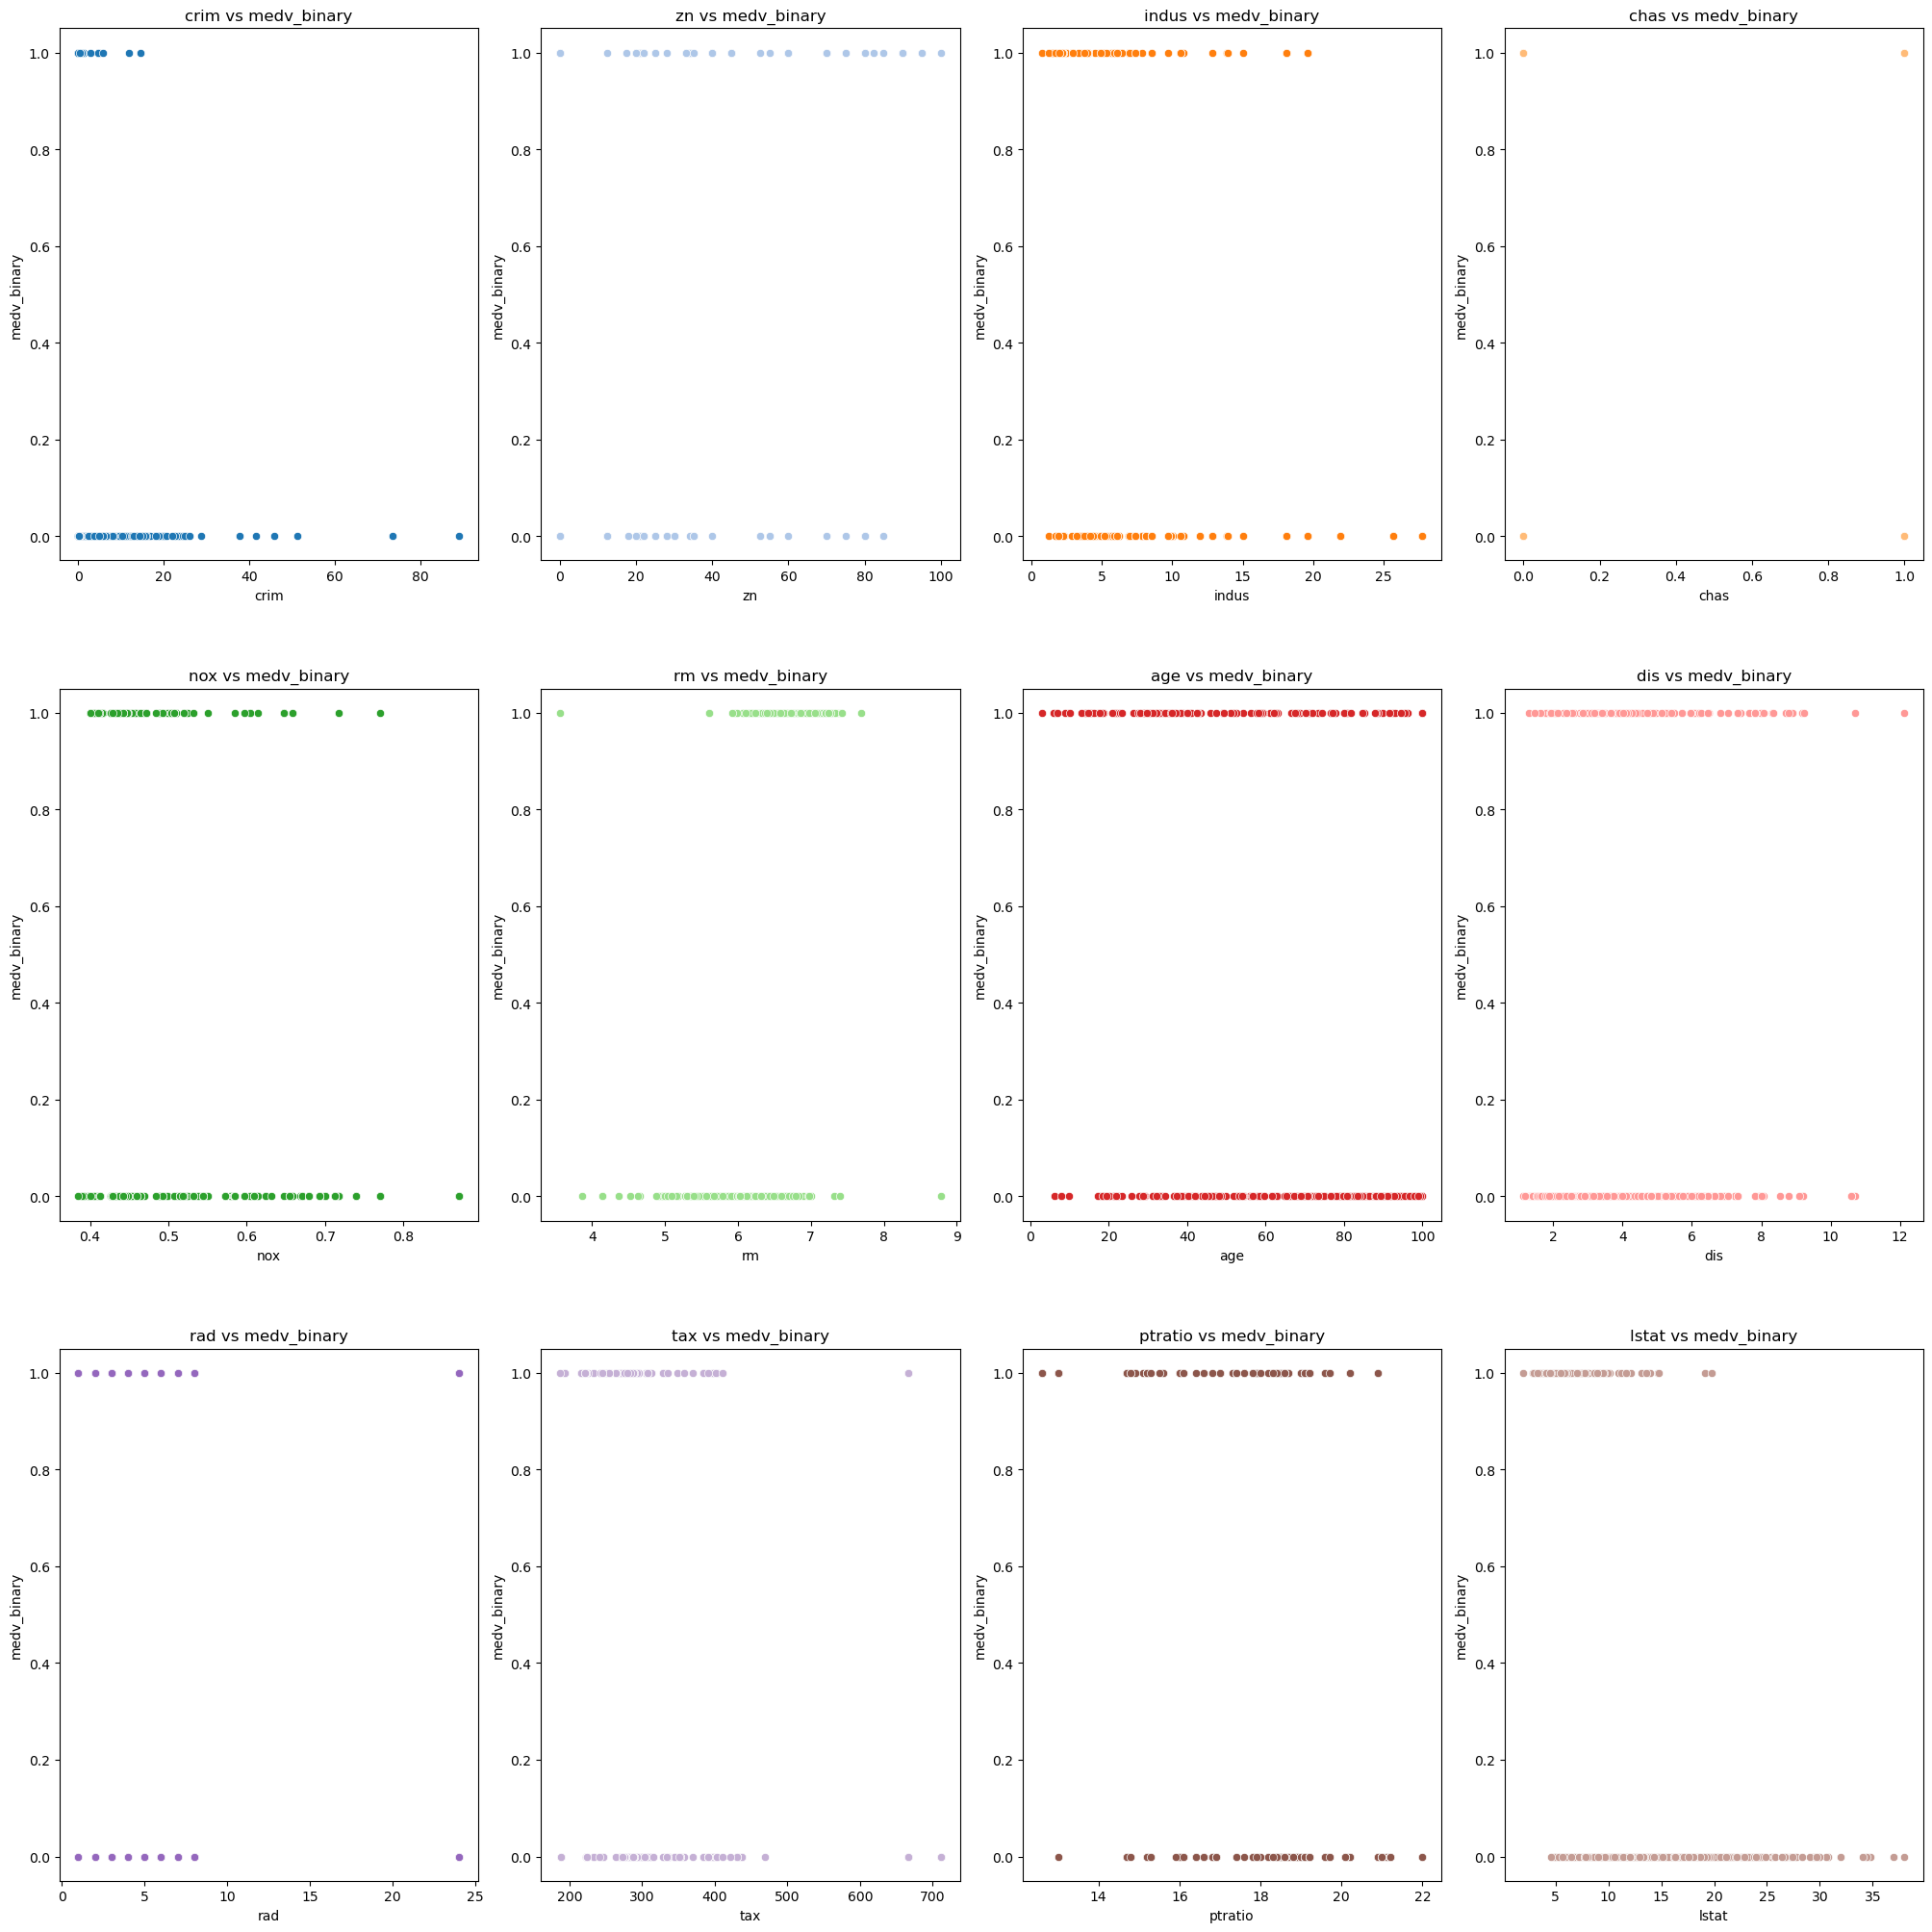

In [142]:
# Select features and target variable
y = filtered_df['medv_binary']

# Create a figure with multiple subplots (one for each feature)
features = filtered_df.drop(columns=['medv', 'medv_binary']).columns  # All features except 'medv' and 'medv_binary'

# Create a figure with 4 rows and 4 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each feature and create a regression plot against MEDV
for i, k in enumerate(features):
    sns.scatterplot(y=y, x=filtered_df[k], ax=ax[i], color=color_dict.get(k, 'gray'))  # Use color_dict for color
    ax[i].set_title(f"{k} vs medv_binary")
    ax[i].set_xlabel(k)
    ax[i].set_ylabel('medv_binary')
    
# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


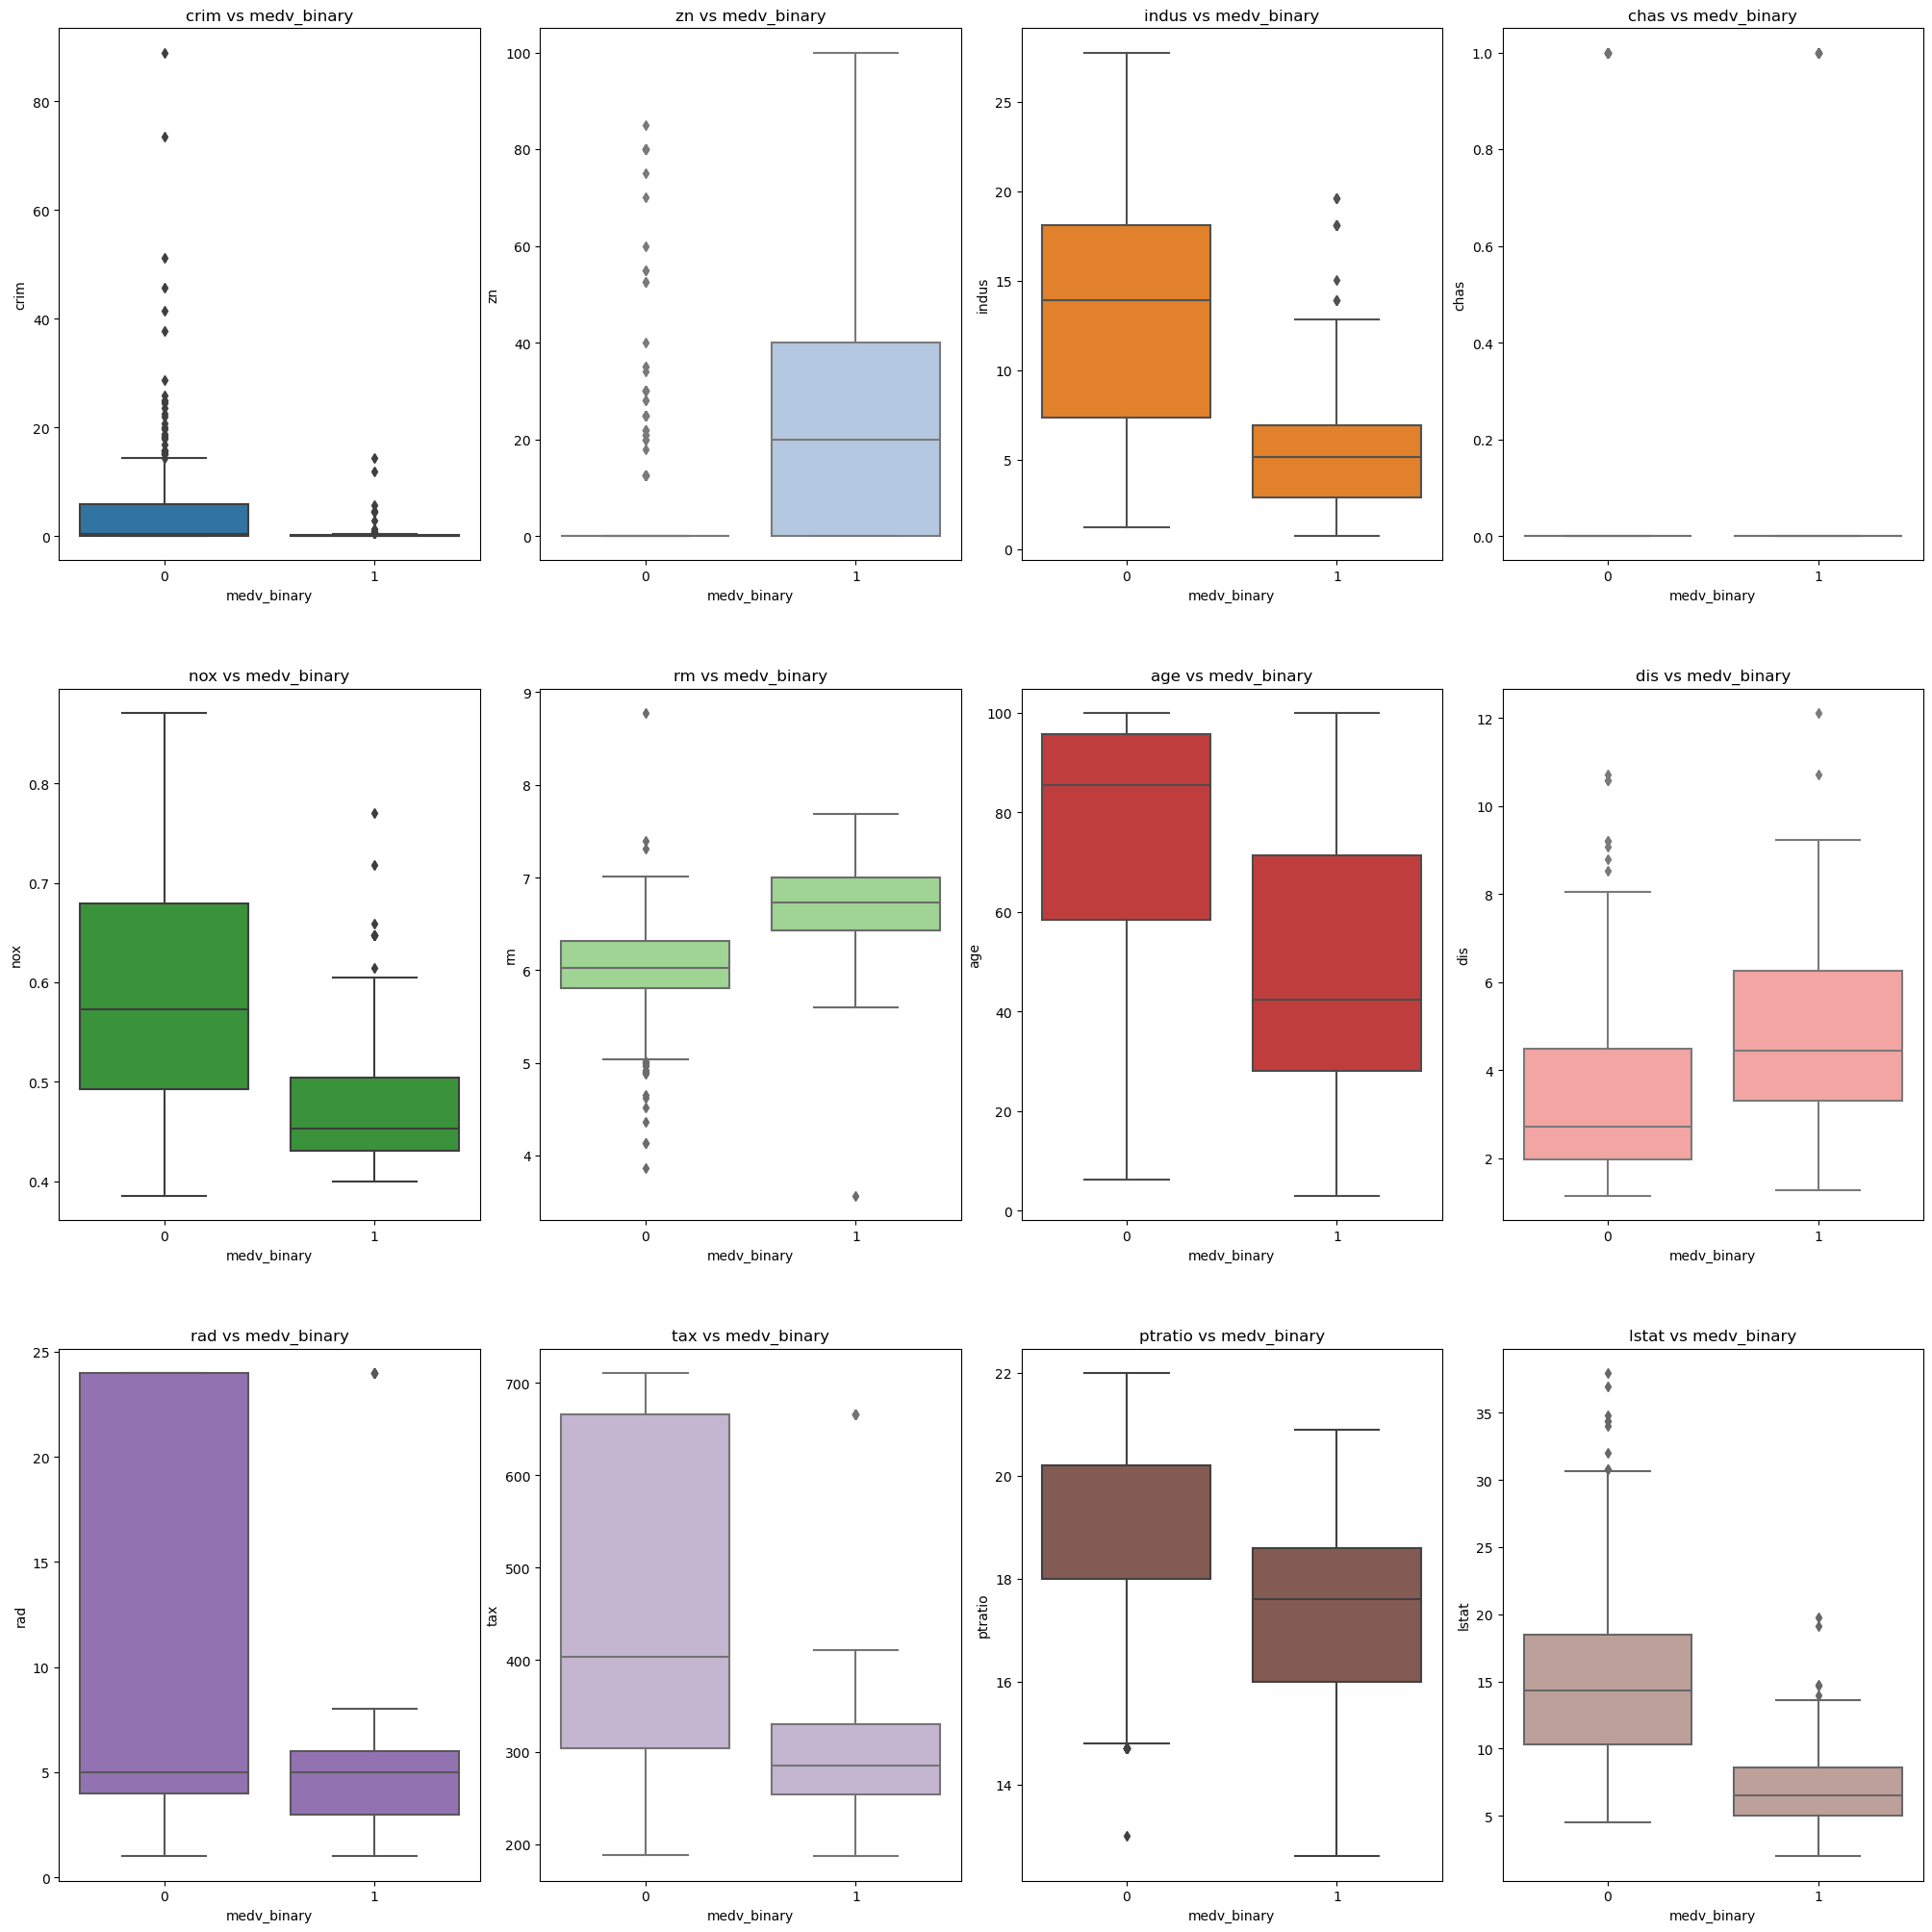

In [143]:
# Boxplot visualization for each feature
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))
ax = ax.flatten()

for i, k in enumerate(features):
    sns.boxplot(x=y, y=filtered_df[k], ax=ax[i], color=color_dict.get(k, 'gray'))
    ax[i].set_title(f"{k} vs medv_binary")
    ax[i].set_xlabel('medv_binary')
    ax[i].set_ylabel(k)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [144]:
# Select features and target variable
features = filtered_df.drop(columns=['medv', 'medv_binary']).columns  # All features except 'medv' and 'medv_binary'
y = filtered_df['medv_binary']

# Split the data into two groups: medv_binary == 0 and medv_binary == 1
group_0 = filtered_df[filtered_df['medv_binary'] == 0]
group_1 = filtered_df[filtered_df['medv_binary'] == 1]

# Initialize lists to store results
t_stats = []
p_values = []

# Perform a t-test for each feature
for feature in features:
    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(group_0[feature], group_1[feature], equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_value)

# Create a DataFrame with the results
t_test_results = pd.DataFrame({
    'Feature': features,
    'T-statistic': t_stats,
    'P-value': p_values
})

# Display the results
print(t_test_results)

    Feature  T-statistic       P-value
0      crim     7.630521  1.571087e-13
1        zn    -6.891025  1.776947e-10
2     indus    12.673596  2.754748e-29
3      chas    -1.187699  2.366384e-01
4       nox    11.187880  9.861513e-25
5        rm   -12.491018  8.733607e-27
6       age     9.475775  1.335193e-17
7       dis    -6.562936  5.204780e-10
8       rad     8.227551  2.723838e-15
9       tax    10.506879  1.353168e-22
10  ptratio     8.352396  1.337075e-14
11    lstat    18.124124  1.137183e-54


In [145]:
# Exclude 'medv', 'medv_binary' from the features and use it as the target
X = filtered_df.drop(columns=['medv','medv_binary'])
y = filtered_df['medv_binary']

In [146]:
# Initialize and fit the logistic regression model
model = CustomLogisticRegression(max_iter=10000)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print(f"Predictions: {predictions[:10]}")
print(f"True labels: {y[:10]}")
print(f"Estimated weights: {model.weights}")

Converged in 8 iterations.
Predictions: [1 0 1 1 1 1 0 0 0 0]
True labels: 0    0
1    0
2    1
3    1
4    1
5    1
6    0
7    1
8    0
9    0
Name: medv_binary, dtype: int32
Estimated weights: [ 1.64459641 -0.01232081  0.00605008 -0.03689758  0.58920127 -4.11583831
  1.87605907 -0.0148341  -0.34711514  0.22066226 -0.00912976 -0.30325505
 -0.26720435]


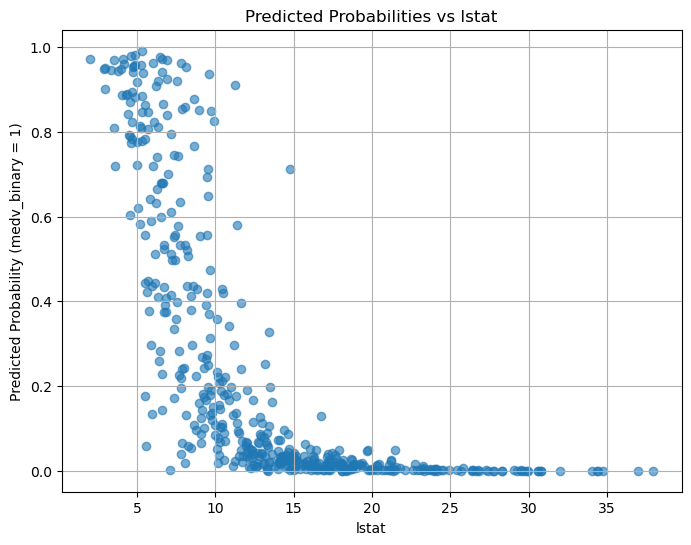

In [148]:
# Generate predicted probabilities for the entire dataset
y_pred_proba = model.predict_proba(X)

# Create the scatter plot with 'lstat' on x-axis and predicted probabilities on y-axis
plt.figure(figsize=(8, 6))
plt.scatter(X['lstat'], y_pred_proba, alpha=0.6)  # Assuming 'lstat' is the last column, use X[:, -1] or extract correct column
plt.title("Predicted Probabilities vs lstat")
plt.xlabel('lstat')
plt.ylabel('Predicted Probability (medv_binary = 1)')
plt.grid(True)
plt.show()


In [149]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Custom Logistic Regression (Gradient Descent or Newton-Raphson) already implemented above.

# Initialize and fit the custom logistic regression model
custom_model = CustomLogisticRegression(max_iter=10000)
custom_model.fit(X, y)

# Initialize and fit scikit-learn's logistic regression model using newton-cg solver
sklearn_model = LogisticRegression(max_iter=10000, solver='newton-cg', penalty='none')  # No regularization for fair comparison
sklearn_model.fit(X, y)

# Make predictions using scikit-learn's logistic regression
sklearn_predictions = sklearn_model.predict(X)

# Compare the results
print("Custom model weights:", custom_model.weights)
print("scikit-learn model coefficients:", sklearn_model.coef_)
print("scikit-learn model intercept:", sklearn_model.intercept_)

# Compare predictions
custom_predictions = custom_model.predict(X)
print("Custom model predictions:", custom_predictions[:10])
print("scikit-learn predictions:", sklearn_predictions[:10])


Converged in 8 iterations.
Custom model weights: [ 1.64459641 -0.01232081  0.00605008 -0.03689758  0.58920127 -4.11583831
  1.87605907 -0.0148341  -0.34711514  0.22066226 -0.00912976 -0.30325505
 -0.26720435]
scikit-learn model coefficients: [[-0.01232081  0.00605008 -0.03689758  0.5892015  -4.11583749  1.87605915
  -0.0148341  -0.34711512  0.22066225 -0.00912976 -0.30325503 -0.26720434]]
scikit-learn model intercept: [1.6445951]
Custom model predictions: [1 0 1 1 1 1 0 0 0 0]
scikit-learn predictions: [1 0 1 1 1 1 0 0 0 0]


In [ ]:
# Updated (240923)